# Ordenar y graficar los datos.
Primero organizamos los datos, la opción que implemente acá es haciendo un ``git clone`` del repositorio de forma que tenga los datos en un archivo locar y así pueda acceder a ellos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os # libreria para comunicarse con archivos remotos o dar comandos como BASH
import scipy.signal as signal

In [2]:
os.remove("Datos/datos_filtrados.csv")
archivos=os.listdir("Datos")
d={"Fecha":[],"Hora":[],"Precio Spot":[], "Monto":[]}
datos=pd.DataFrame(data=d)
for i in archivos:
    print("-"*20,i,"-"*20)
    arch=pd.read_csv("Datos/"+i,sep=";",header=None,names=["Parte fecha","Parte Hora","Precio Spot","Monto"])
    arch["Precio Spot"]=arch["Precio Spot"].str.replace(",",".").astype(float)
    arch["Monto"]=arch["Monto"].astype(str).str.replace(",",".").astype(float)
    arch["Fecha"]=arch["Parte fecha"].str[:-7]
    arch["Hora"]=arch["Parte Hora"].str[10:]
    df=pd.concat([arch["Fecha"],arch["Hora"],arch["Precio Spot"],arch["Monto"]],axis=1)
    datos=pd.concat([datos,df],ignore_index=True,sort=False)
datos.to_csv("Datos/datos_filtrados.csv",index=False)

-------------------- transacciones2008.txt --------------------
-------------------- transacciones2009.txt --------------------
-------------------- transacciones2010.txt --------------------


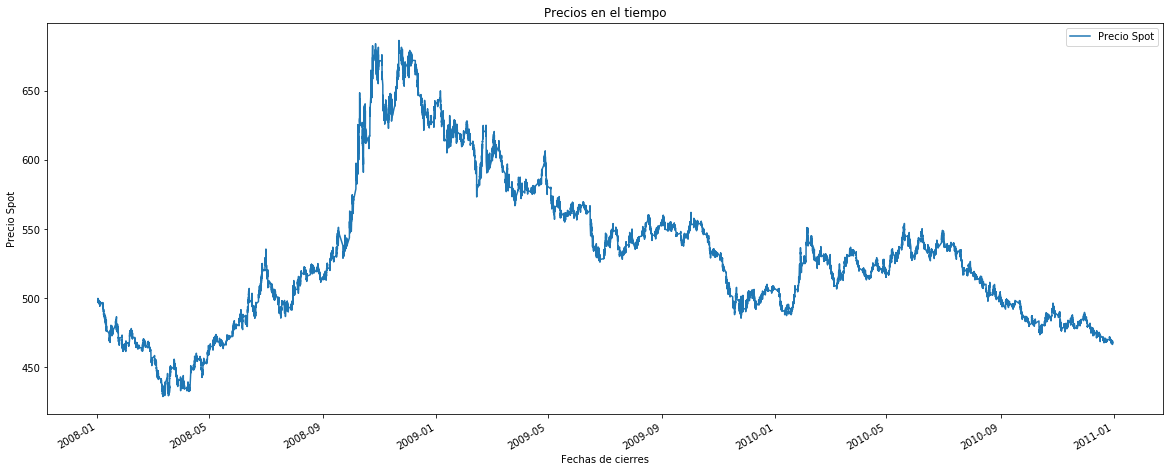

In [3]:
archivo=pd.read_csv("Datos/datos_filtrados.csv")
archivo['Time']=pd.to_datetime(archivo['Fecha'] + ' ' + archivo['Hora'],format = "%d/%m/%Y %H:%M:%S")
datos=archivo[["Time","Precio Spot"]]
datos.set_index(["Time"],inplace=True)
ax=datos.plot(figsize=(20,8),title="Precios en el tiempo")
ax.set_xlabel("Fechas de cierres")
ax.set_ylabel("Precio Spot")
plt.show()

# Efectuar los filtros


In [4]:
precios=np.array(datos["Precio Spot"])
N=[1,2,3,4,5]
Wn =np.linspace(0.001,0.9,10)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


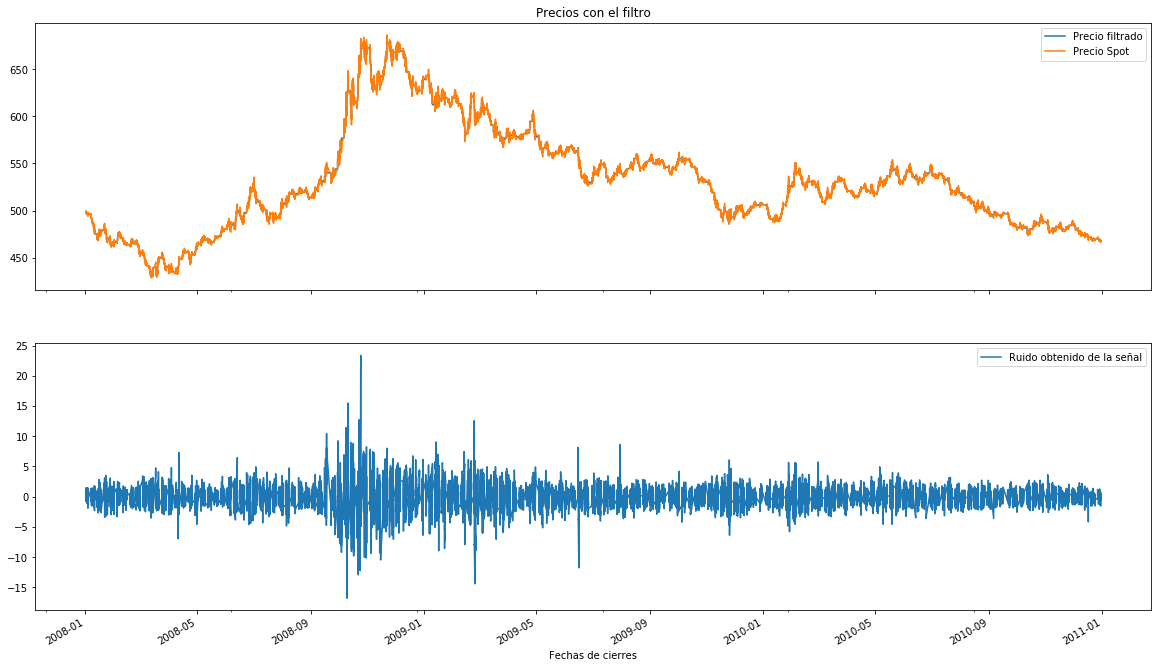

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


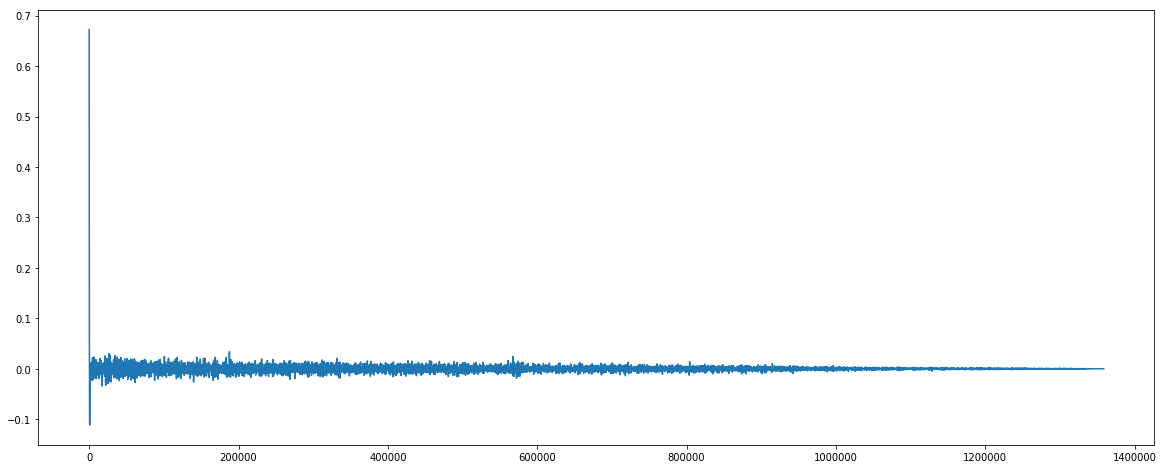

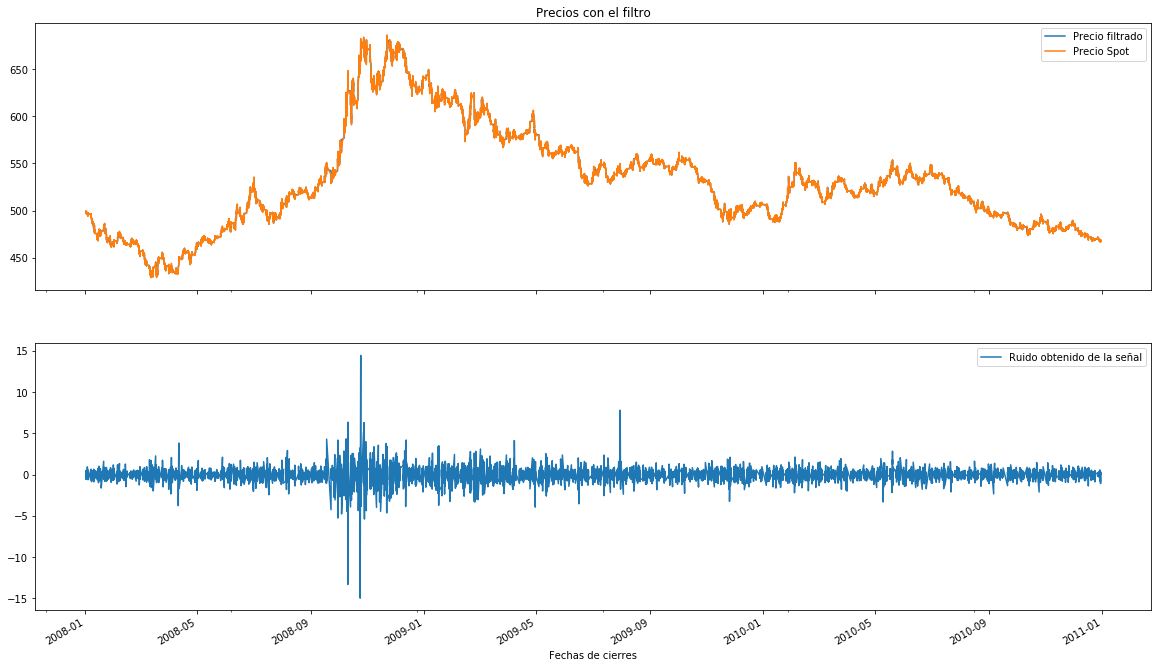

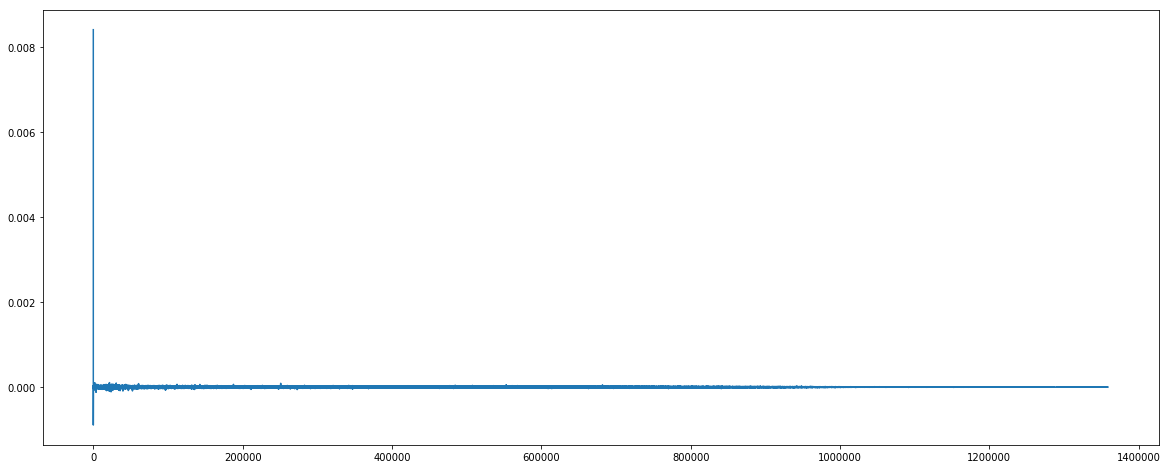

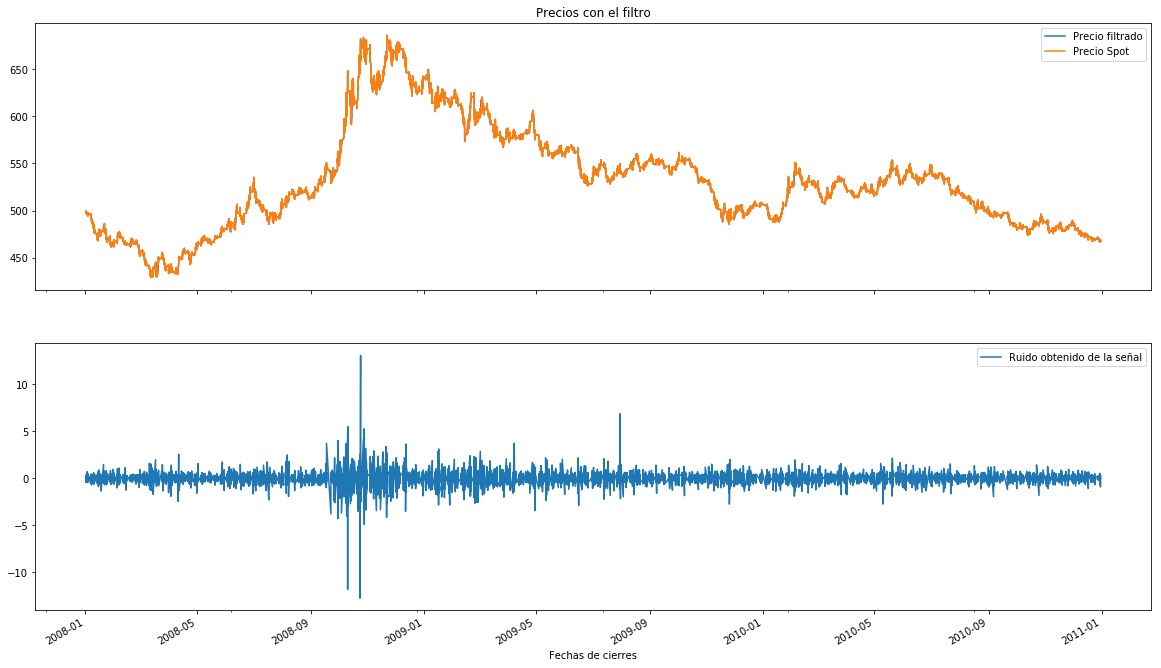

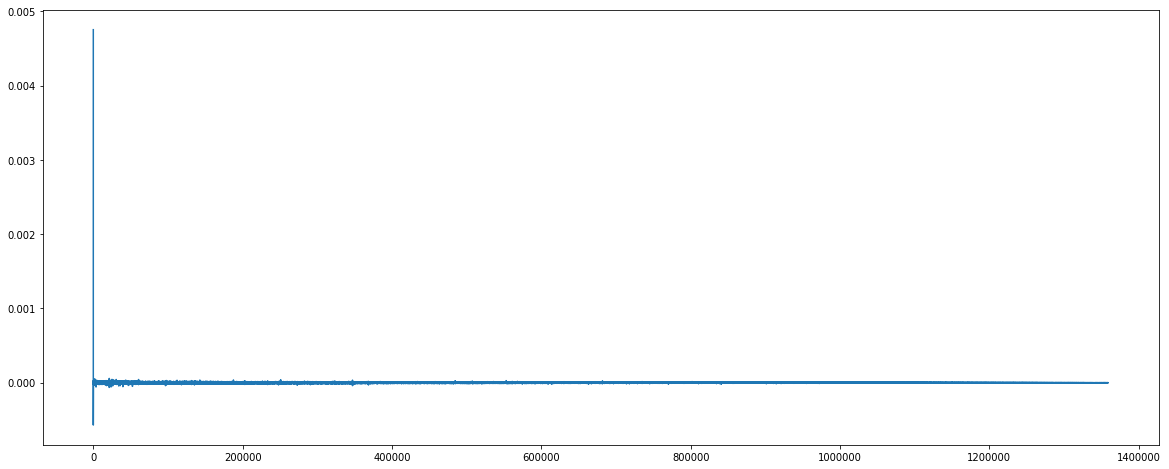

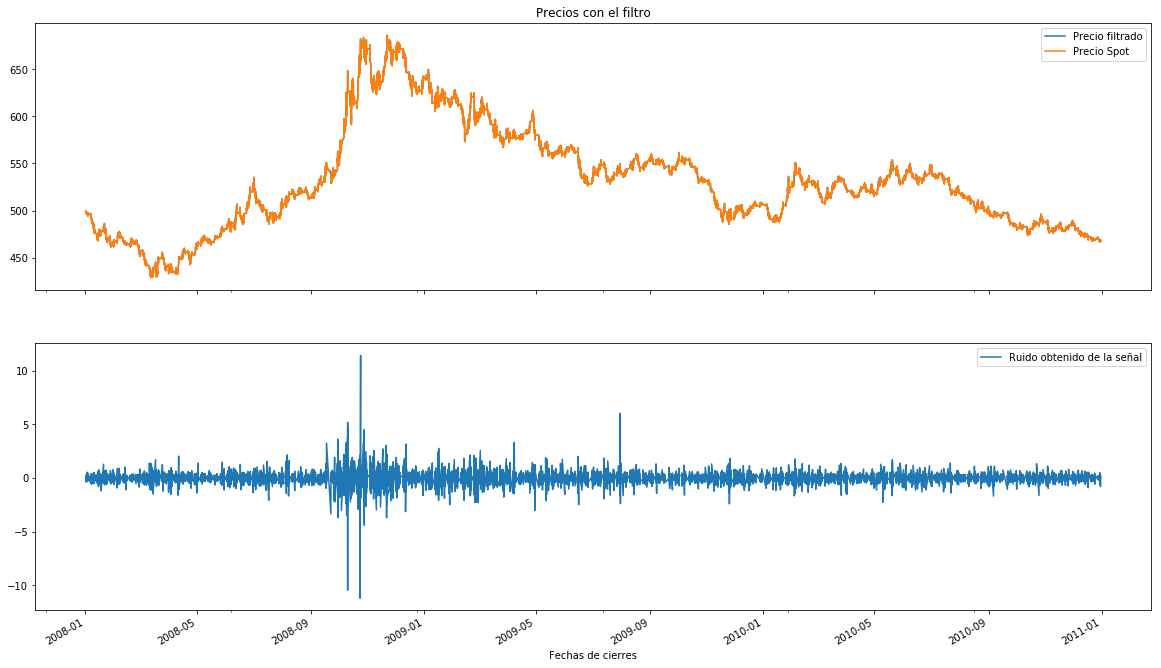

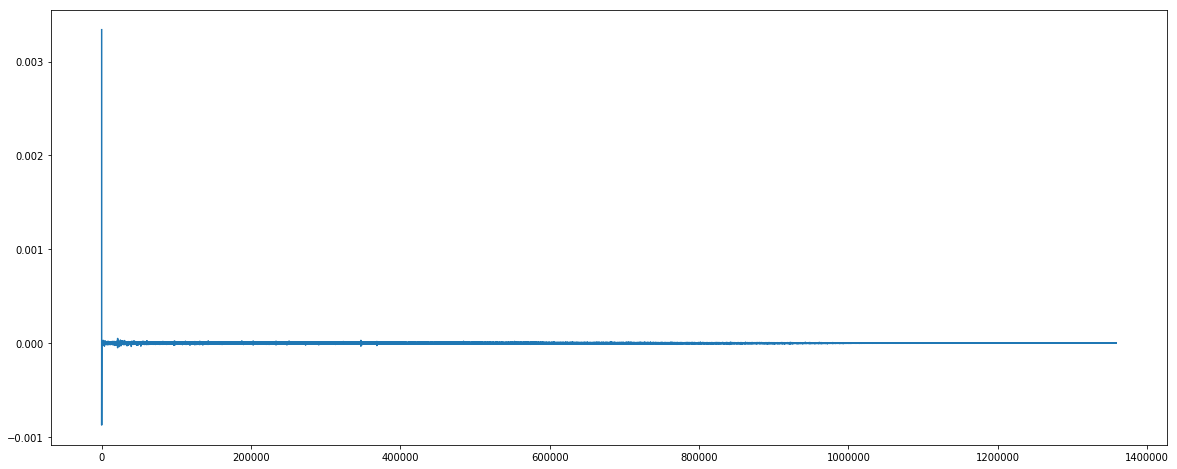

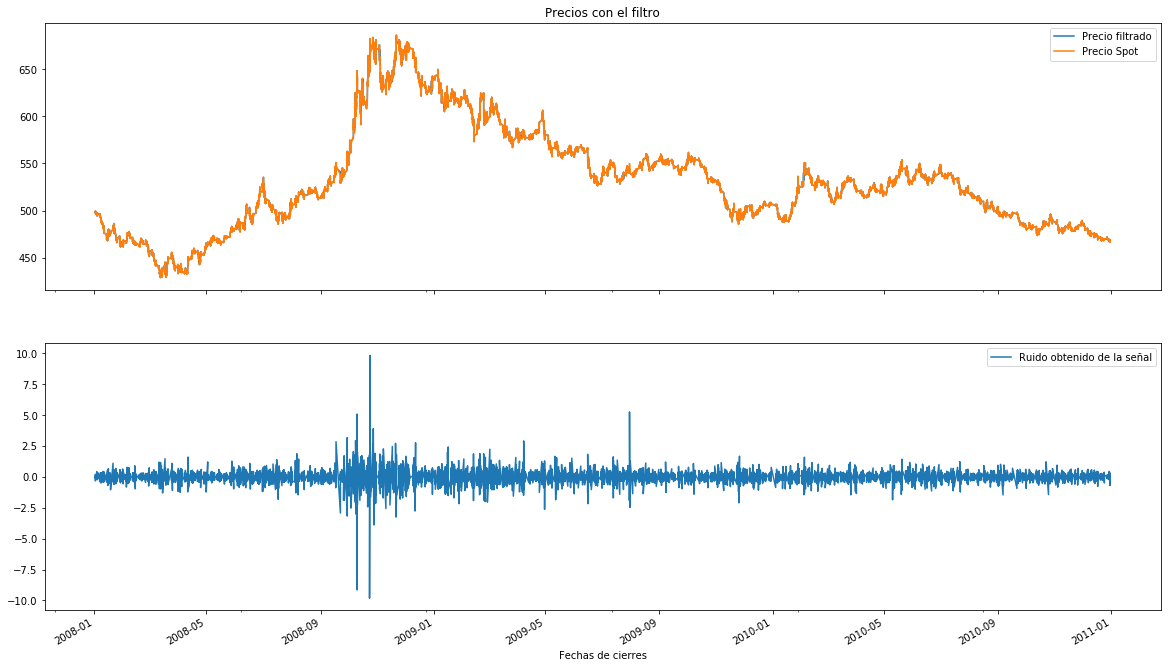

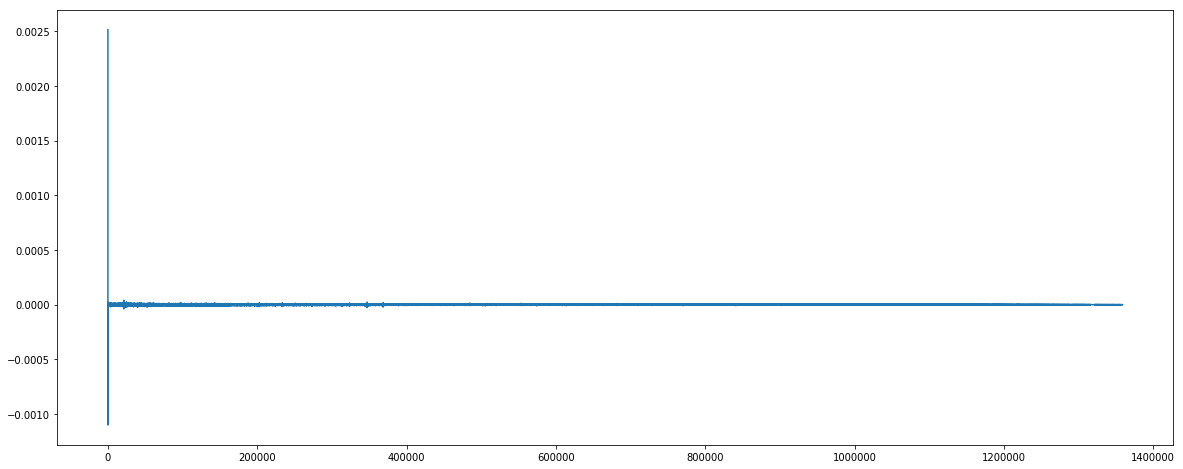

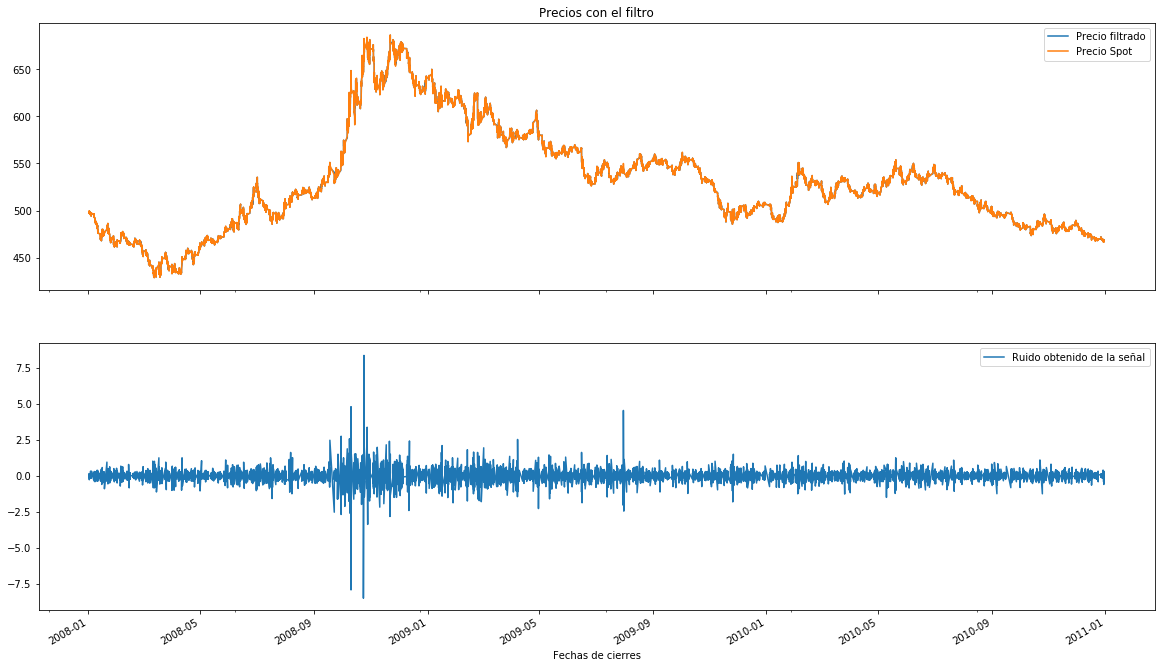

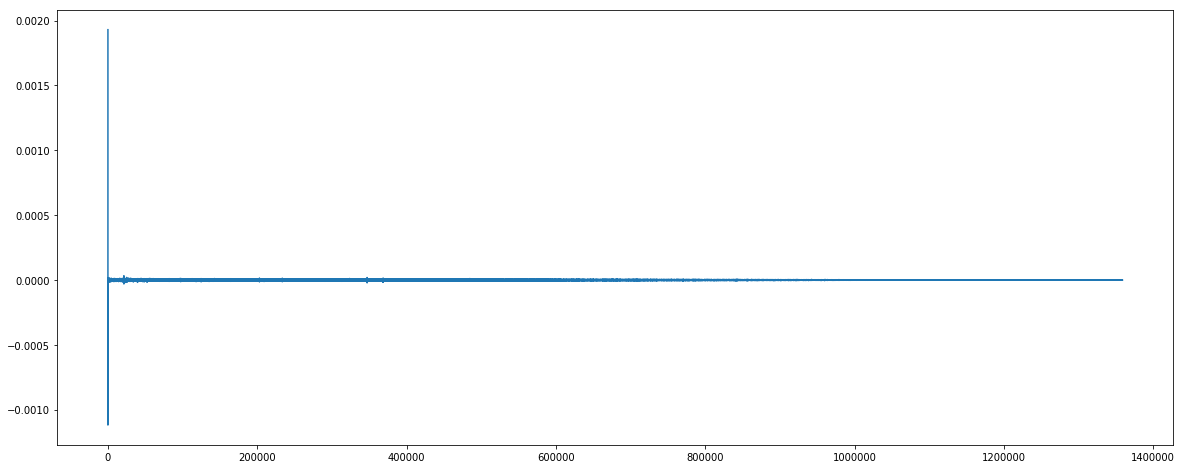

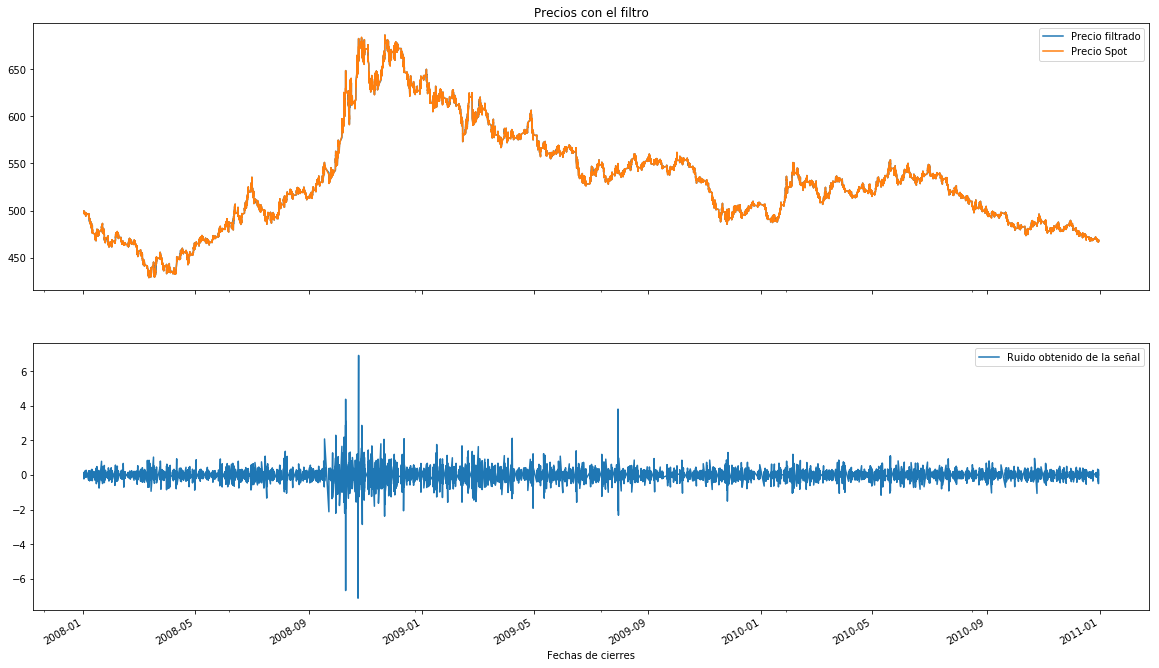

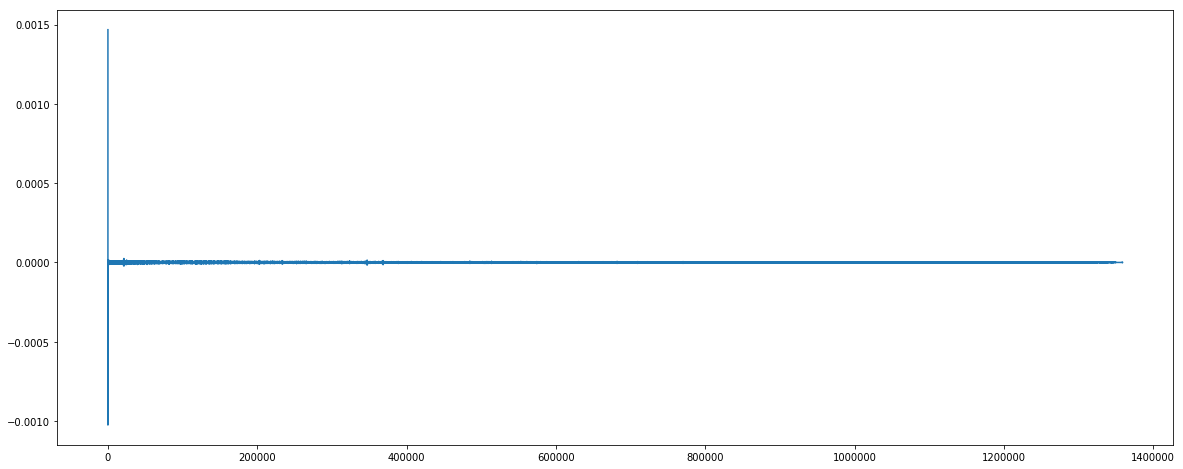

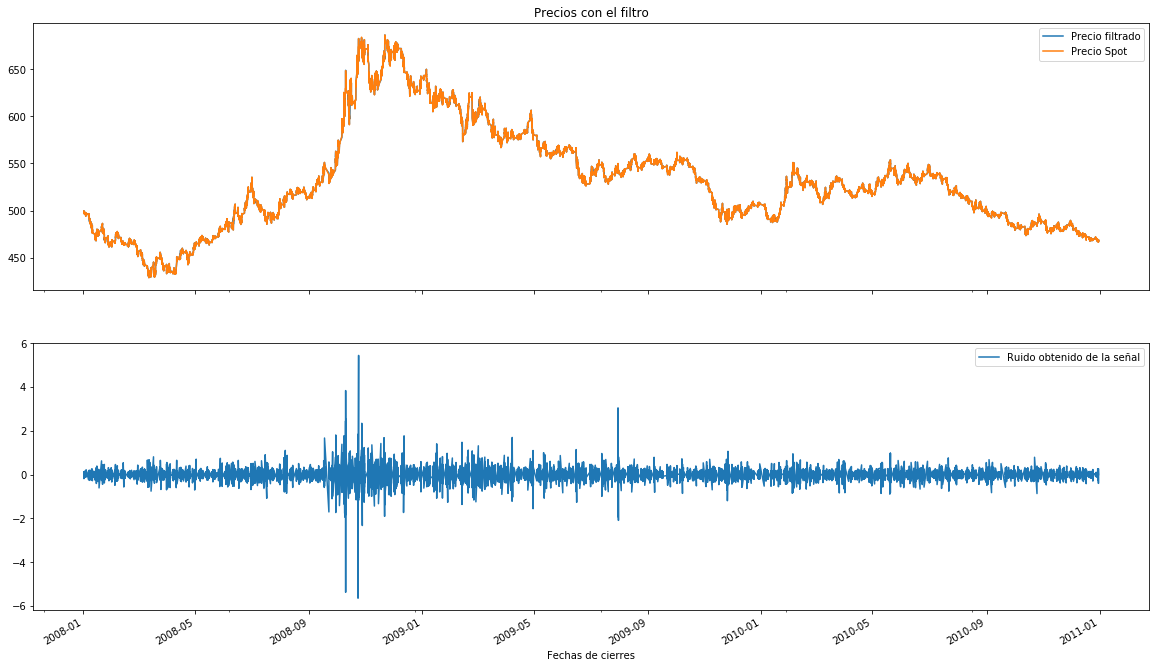

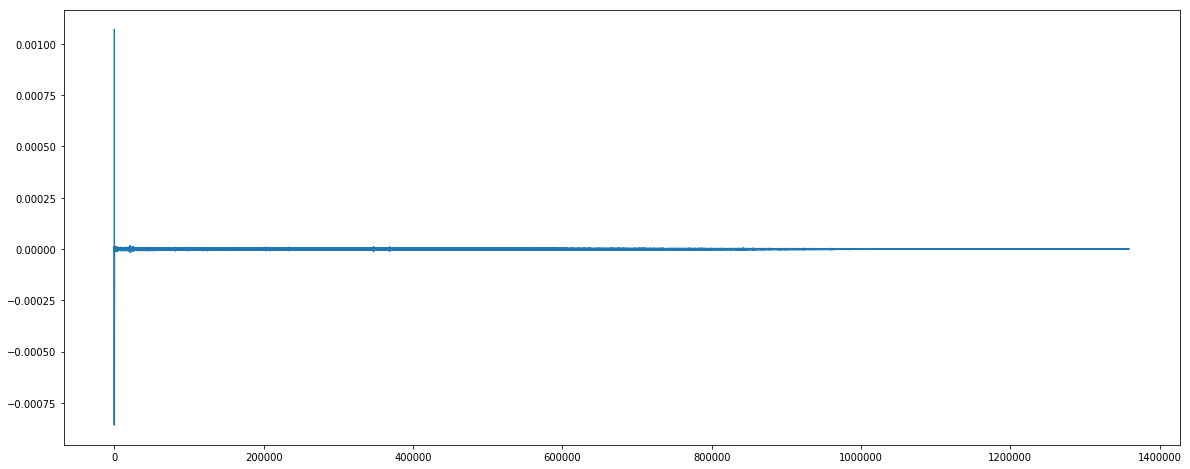

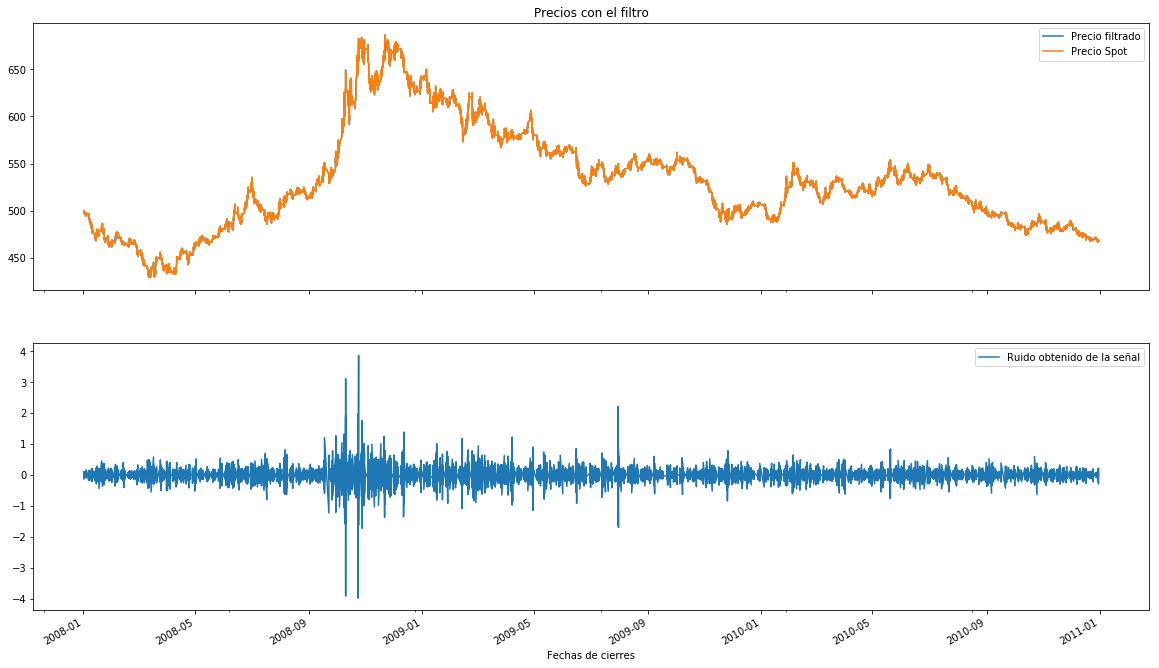

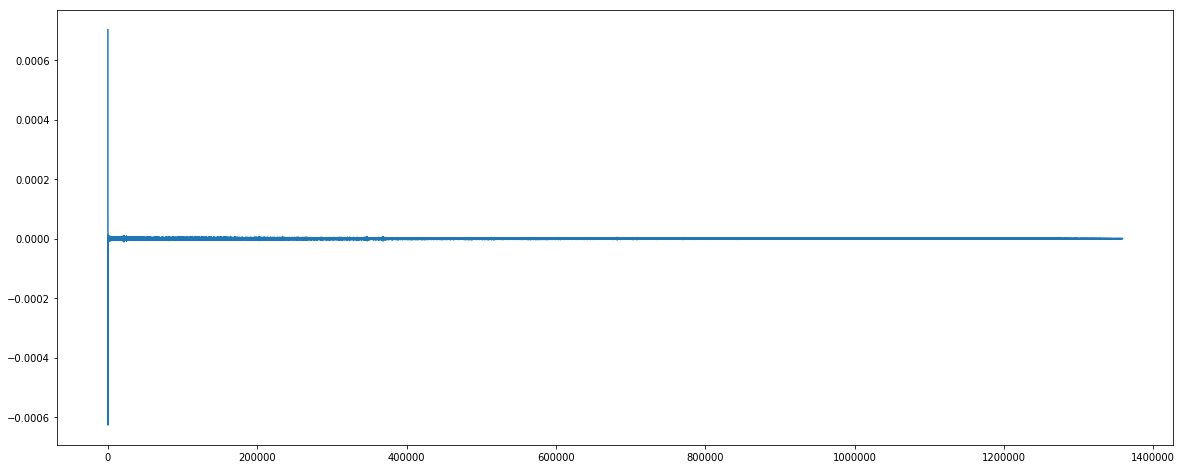

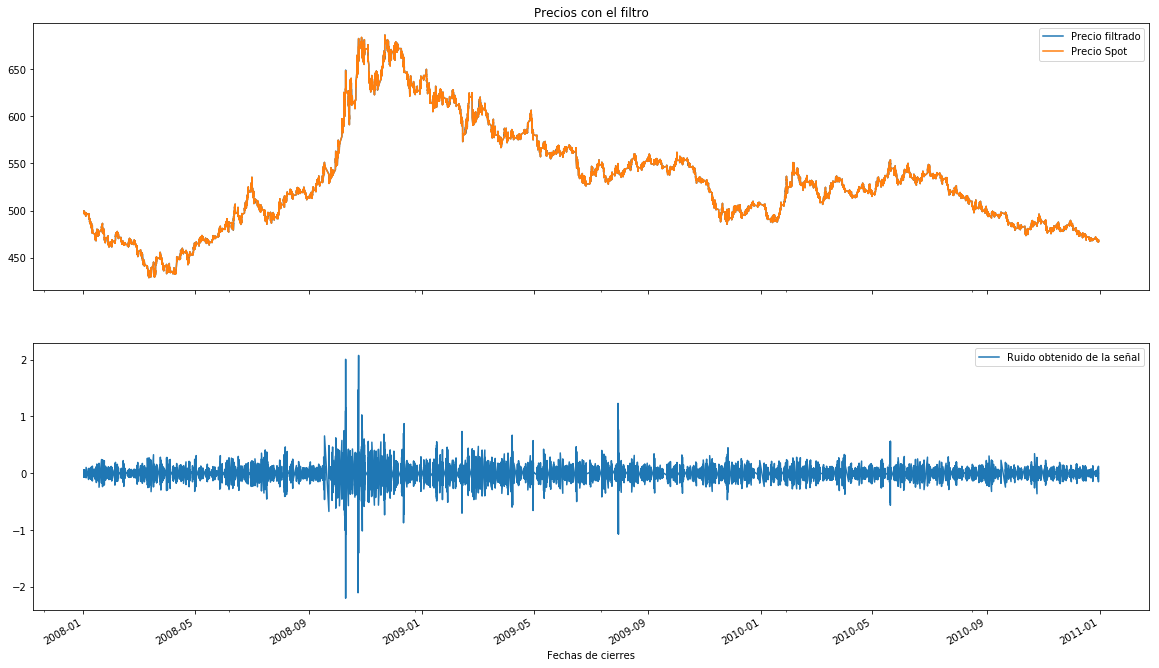

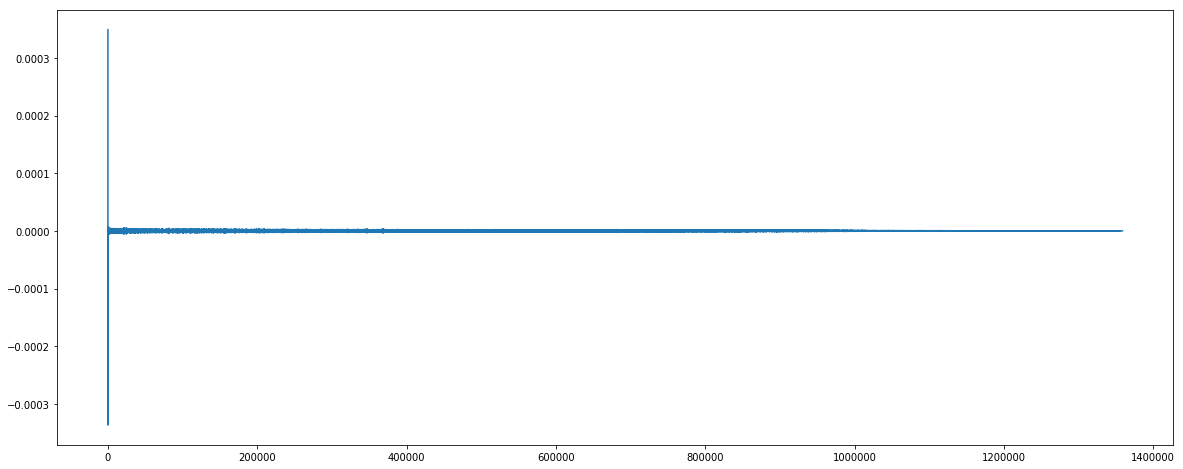

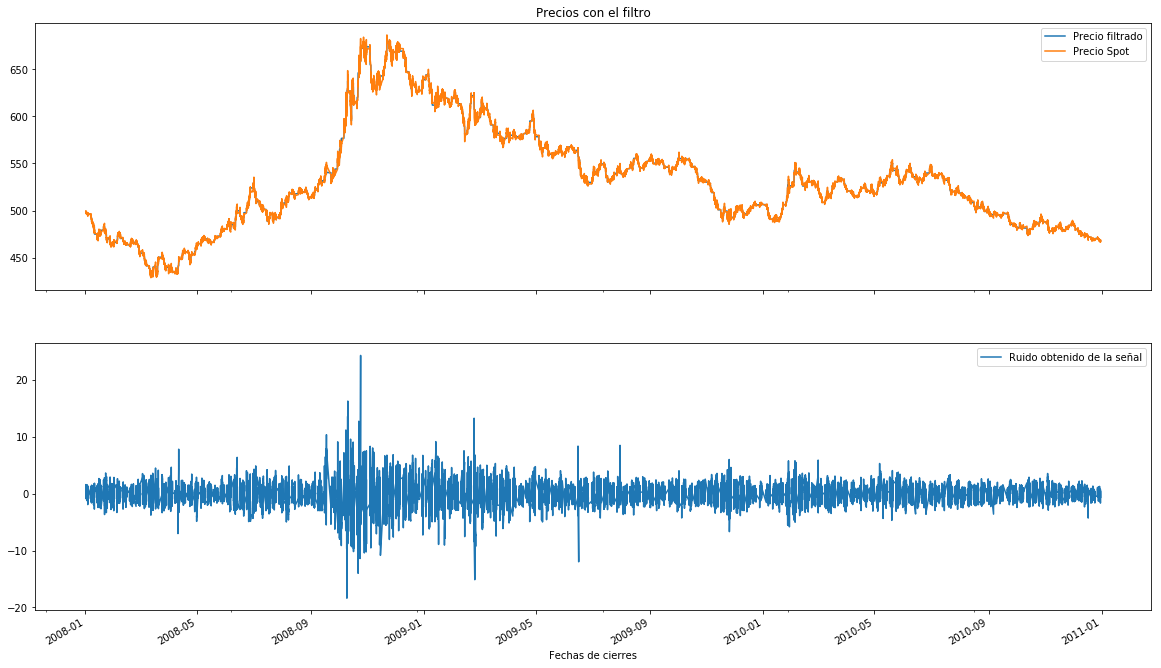

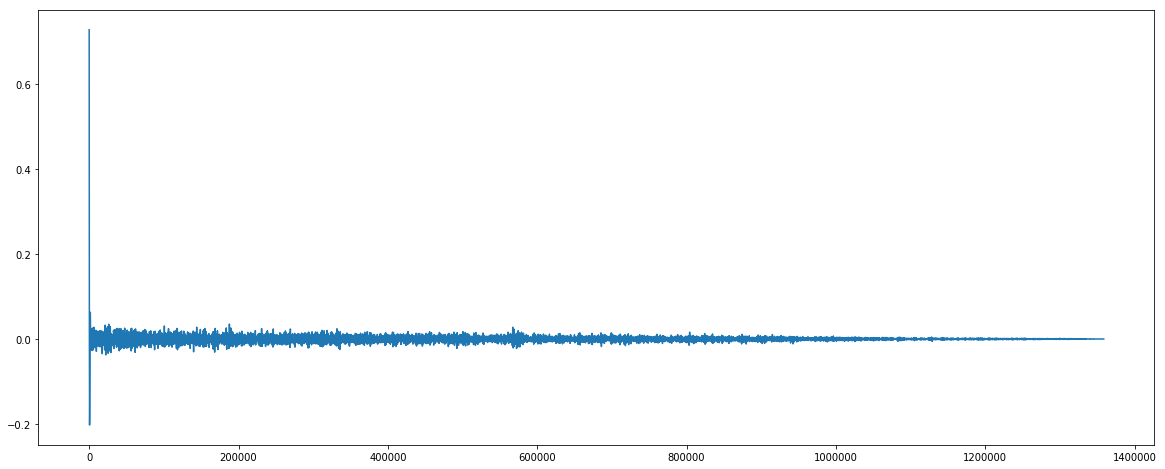

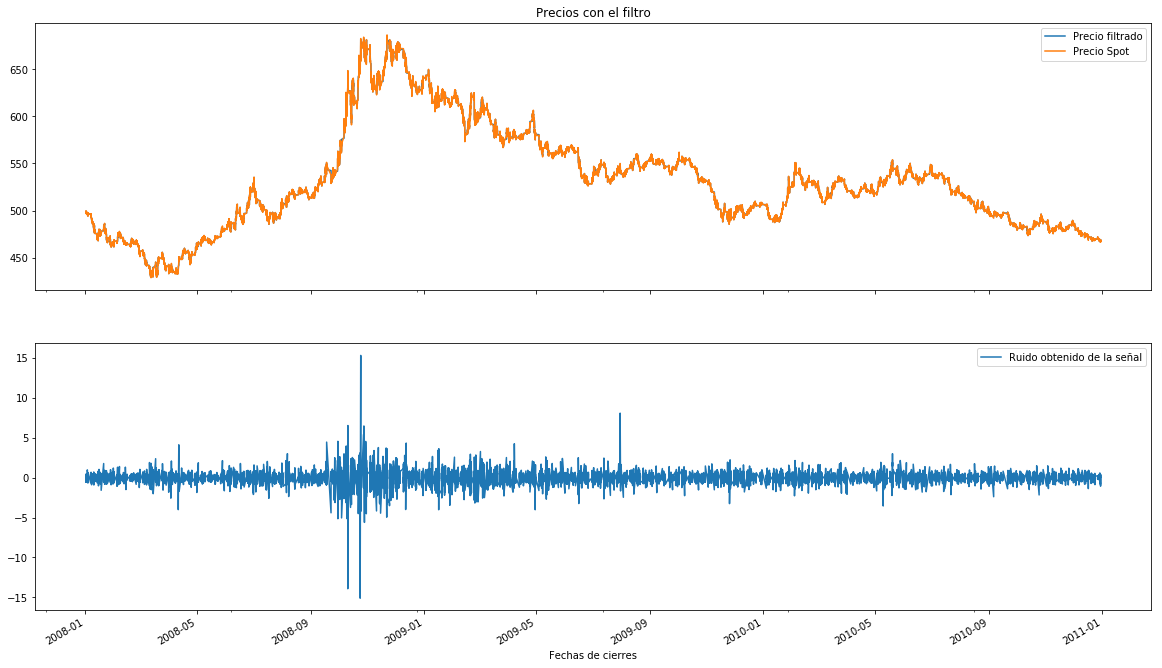

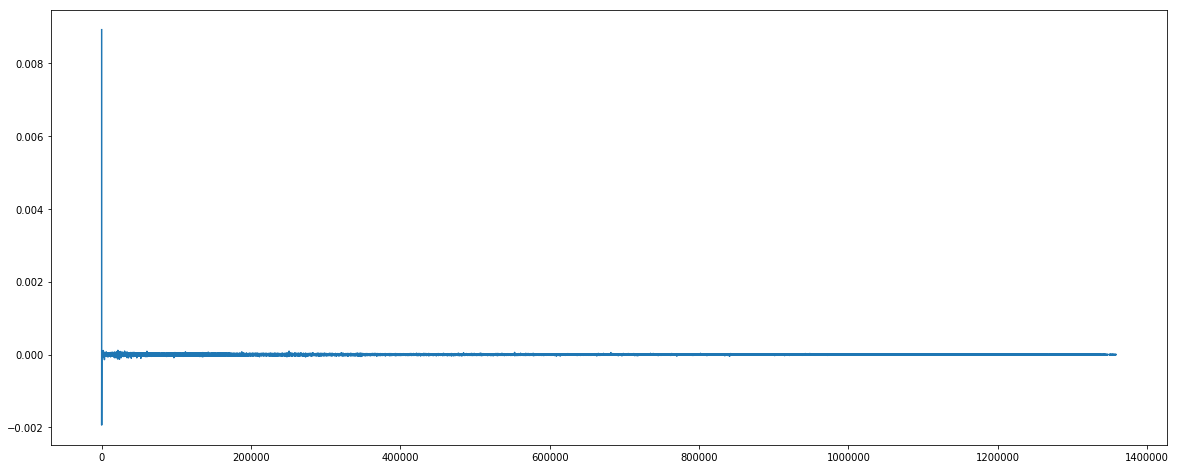

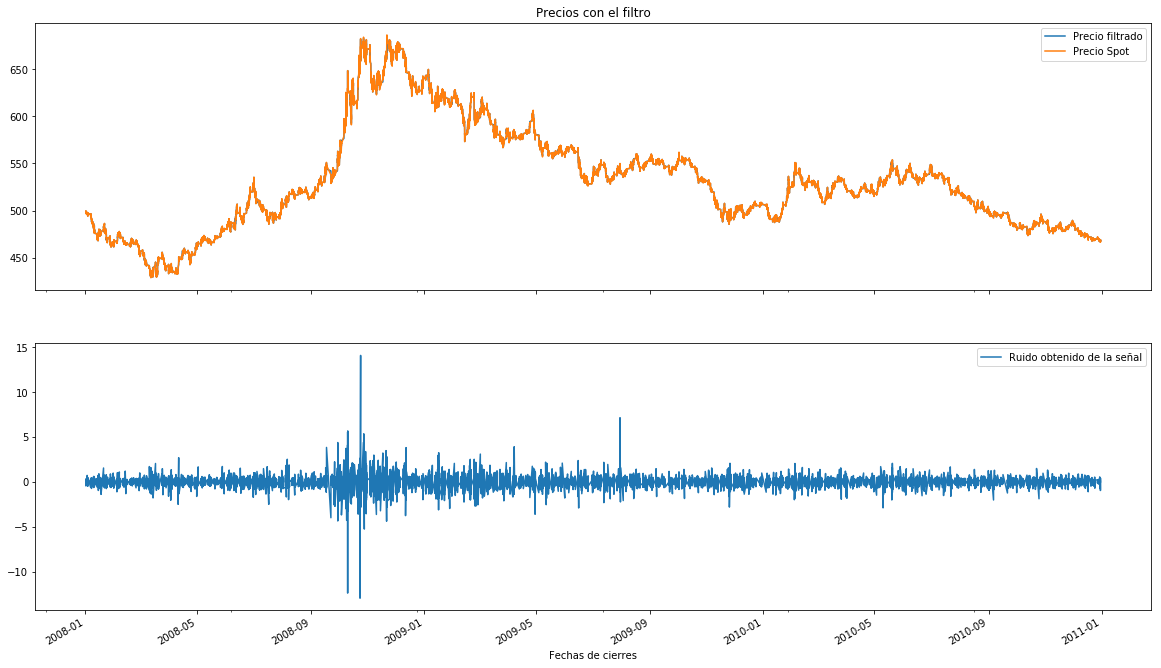

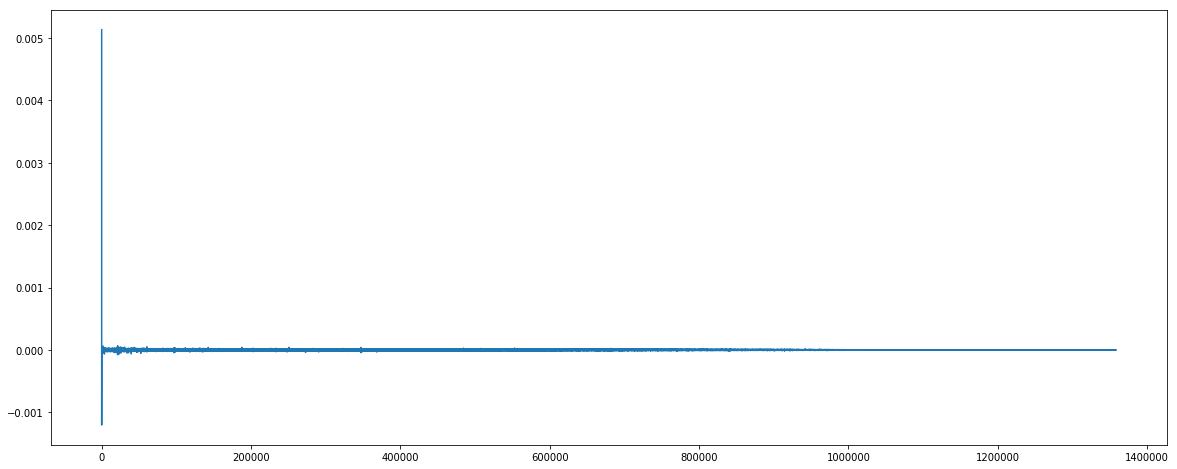

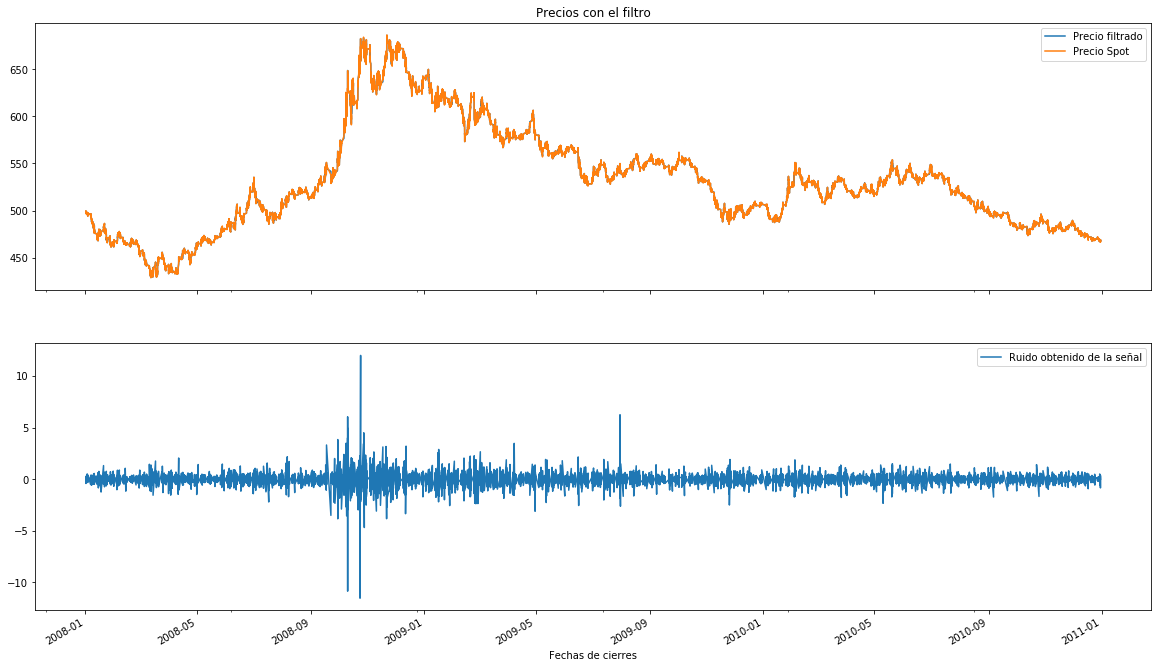

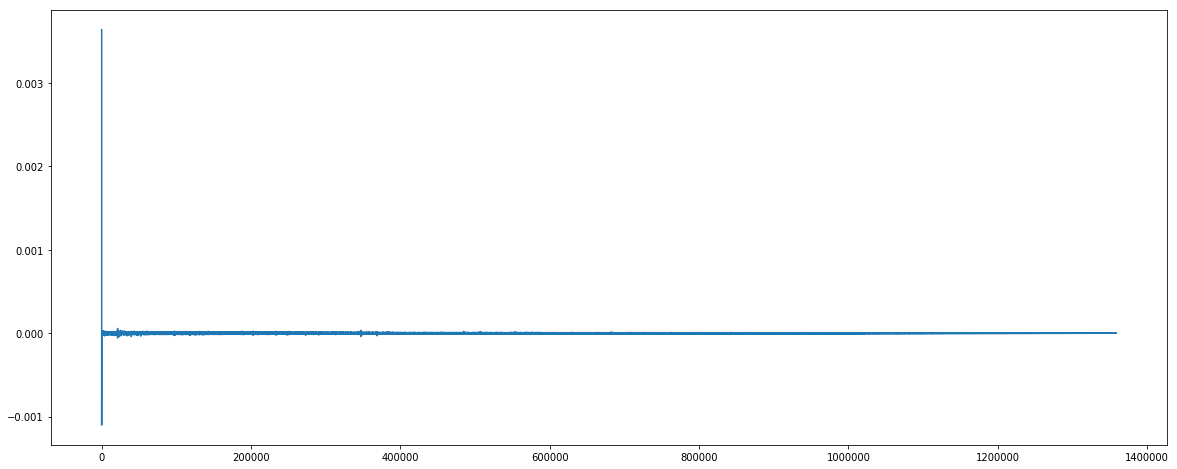

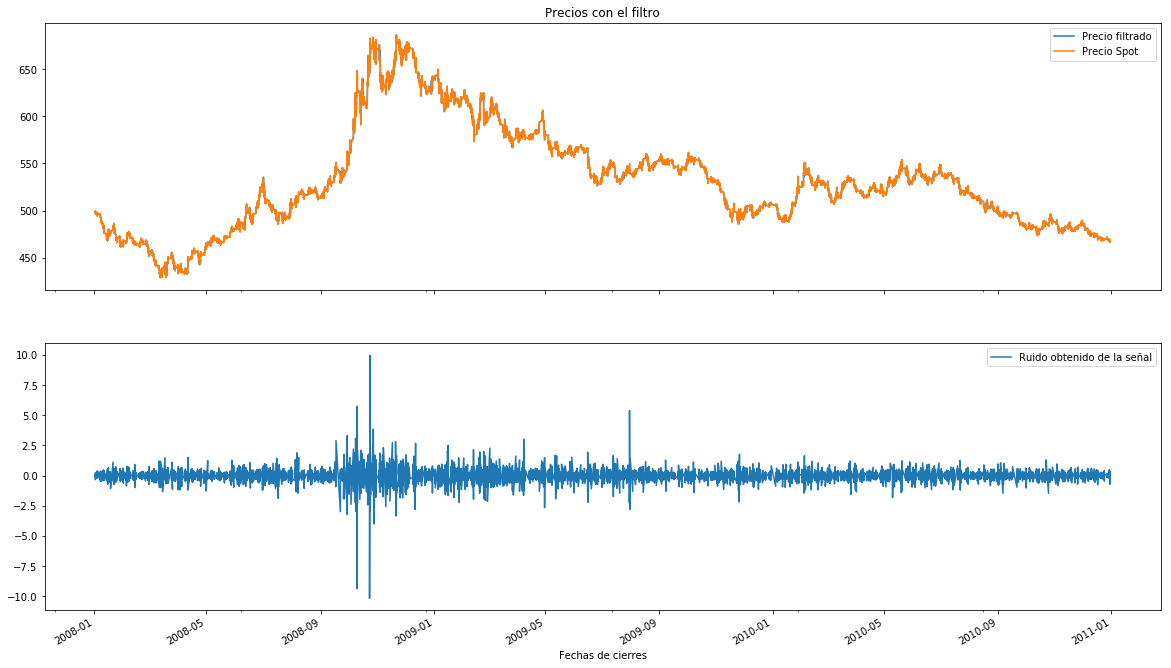

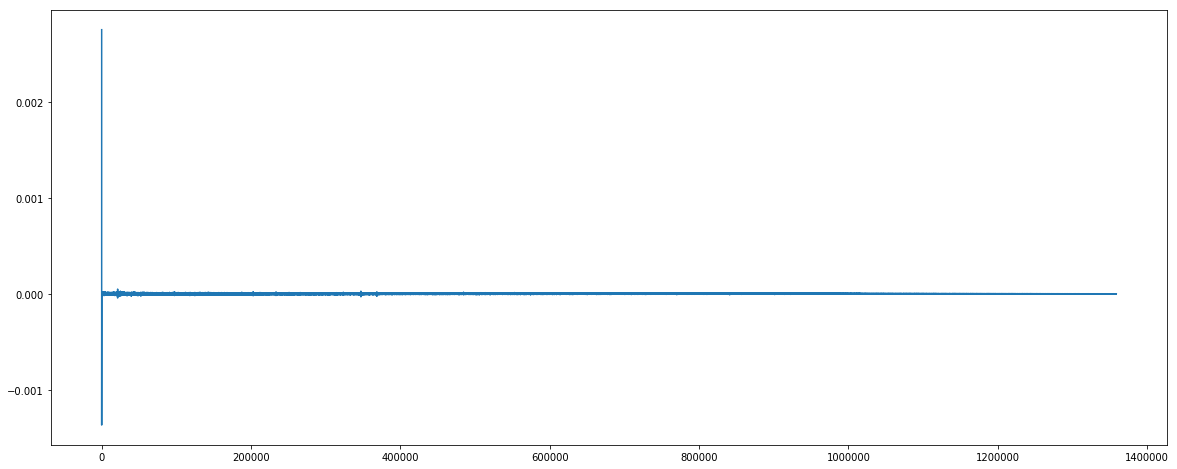

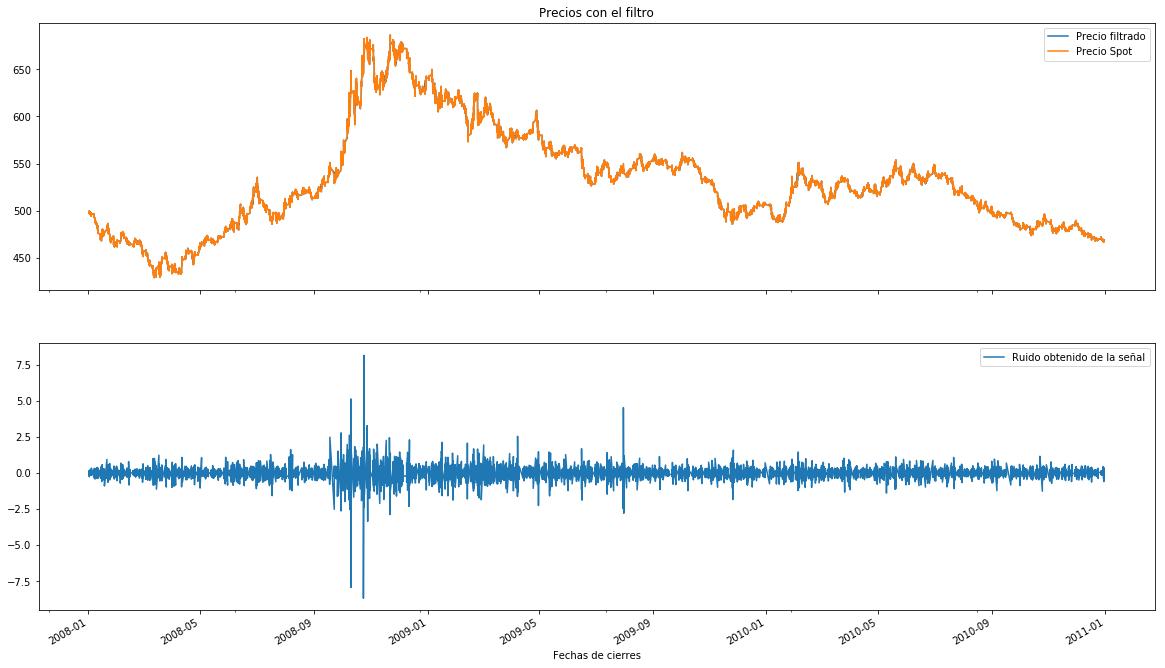

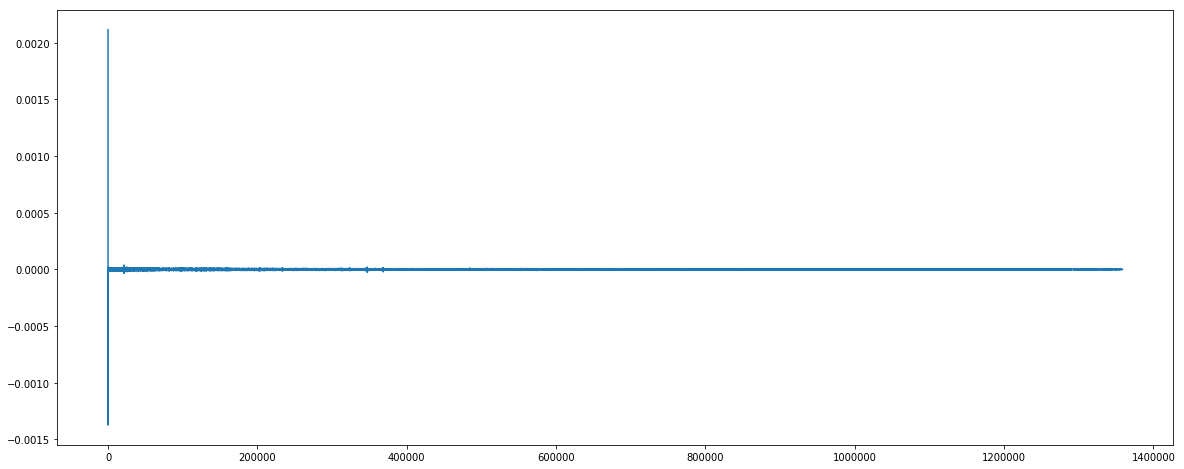

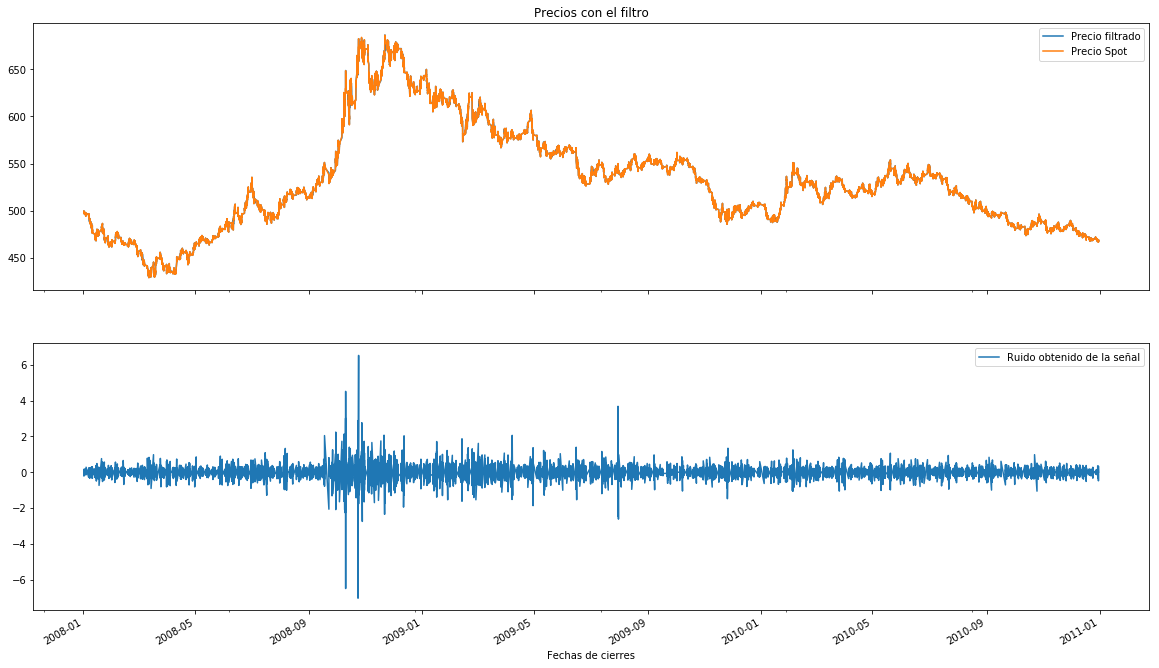

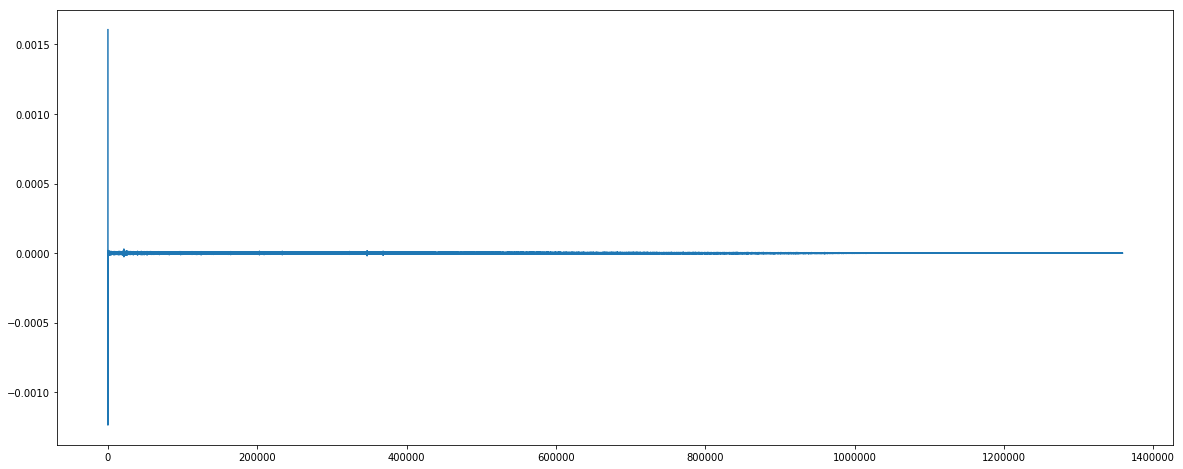

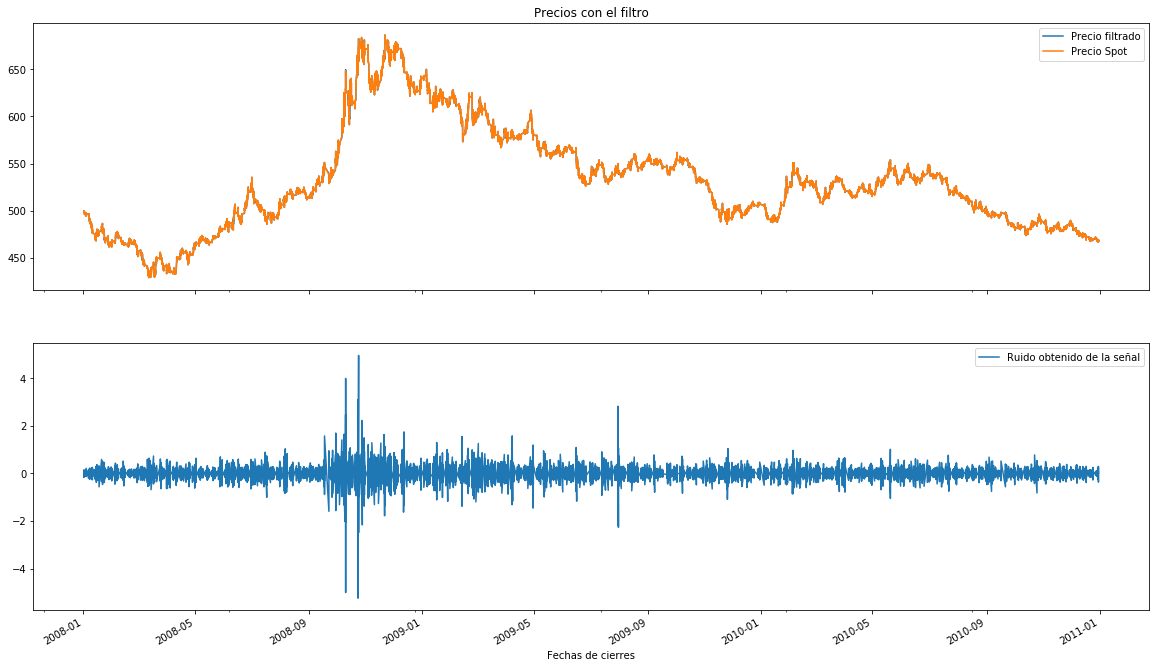

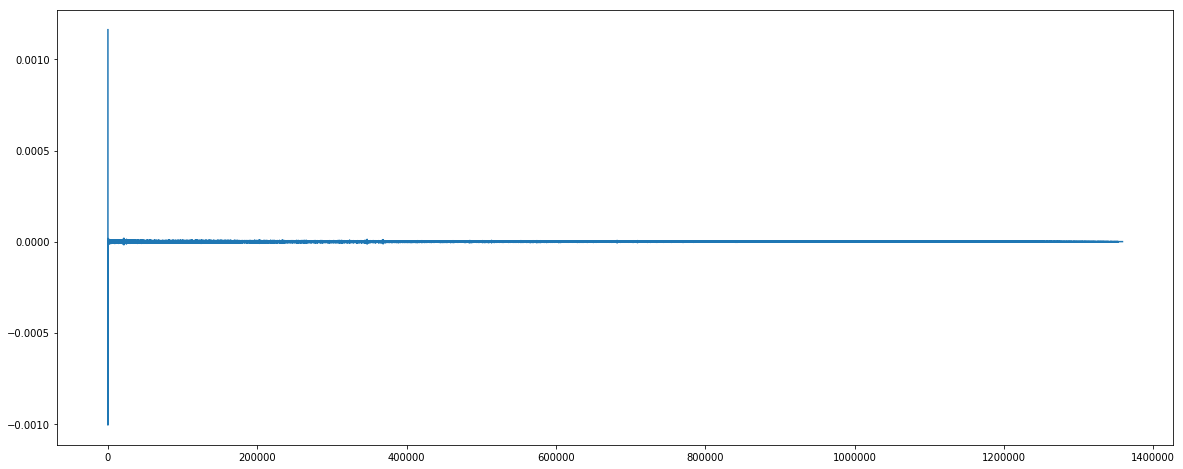

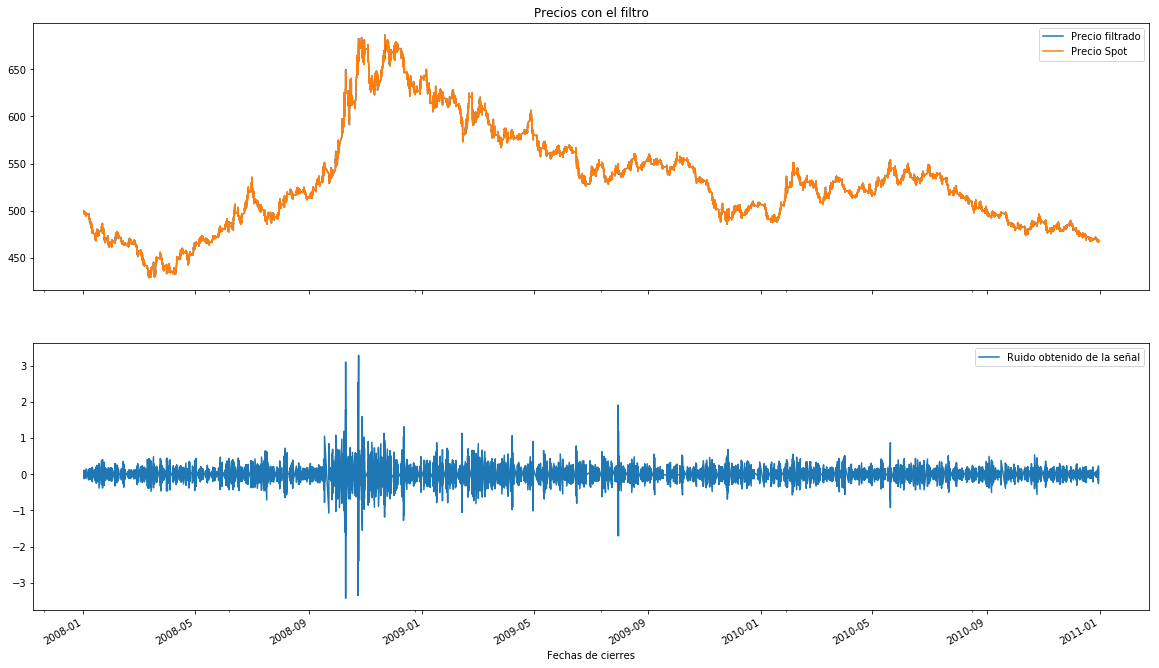

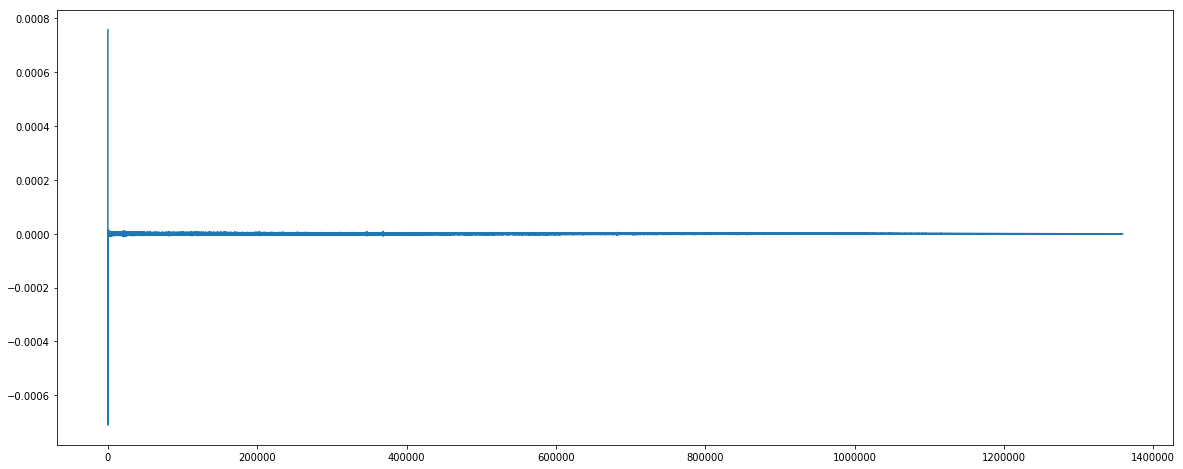

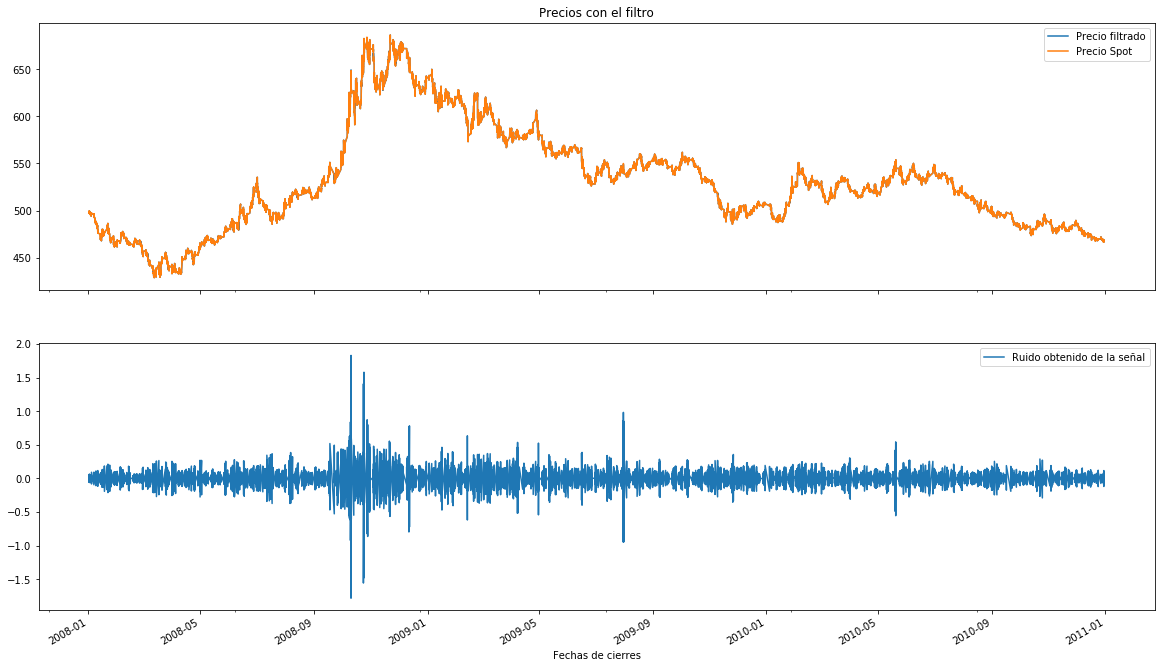

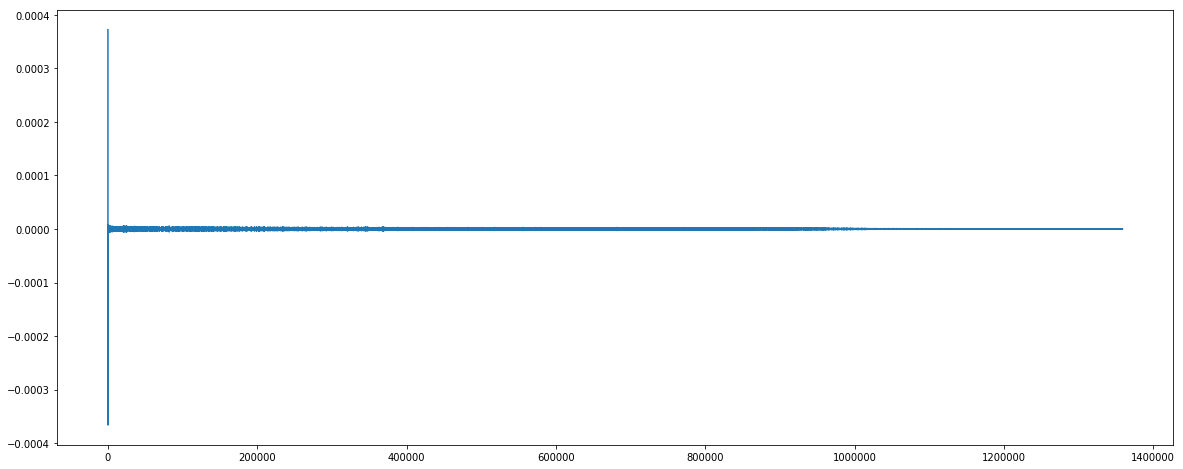

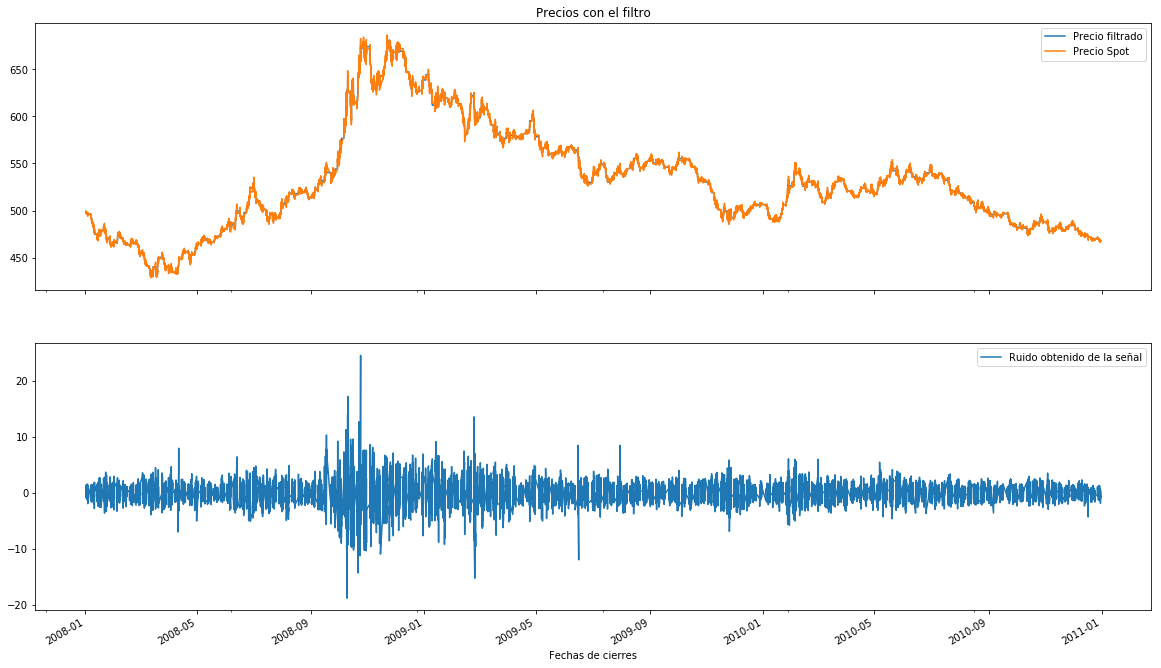

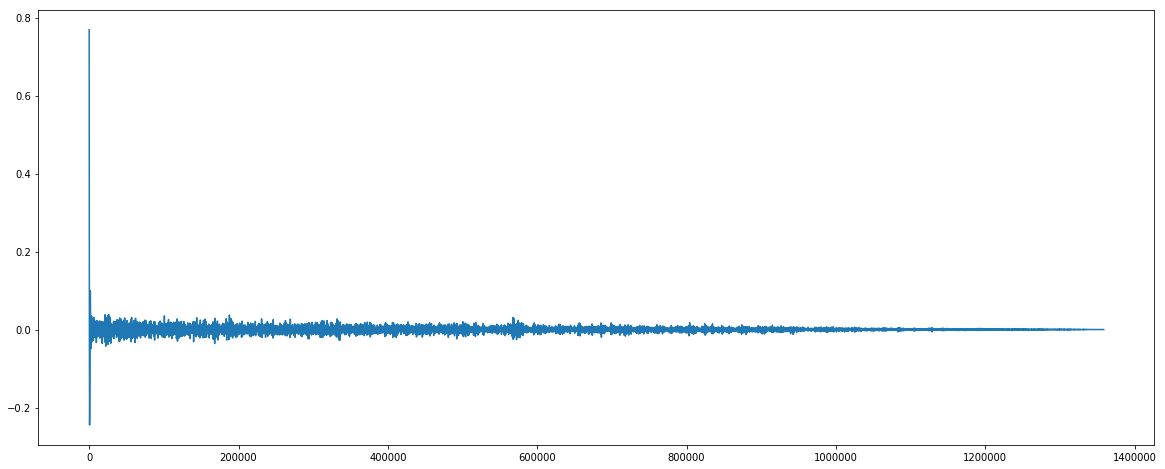

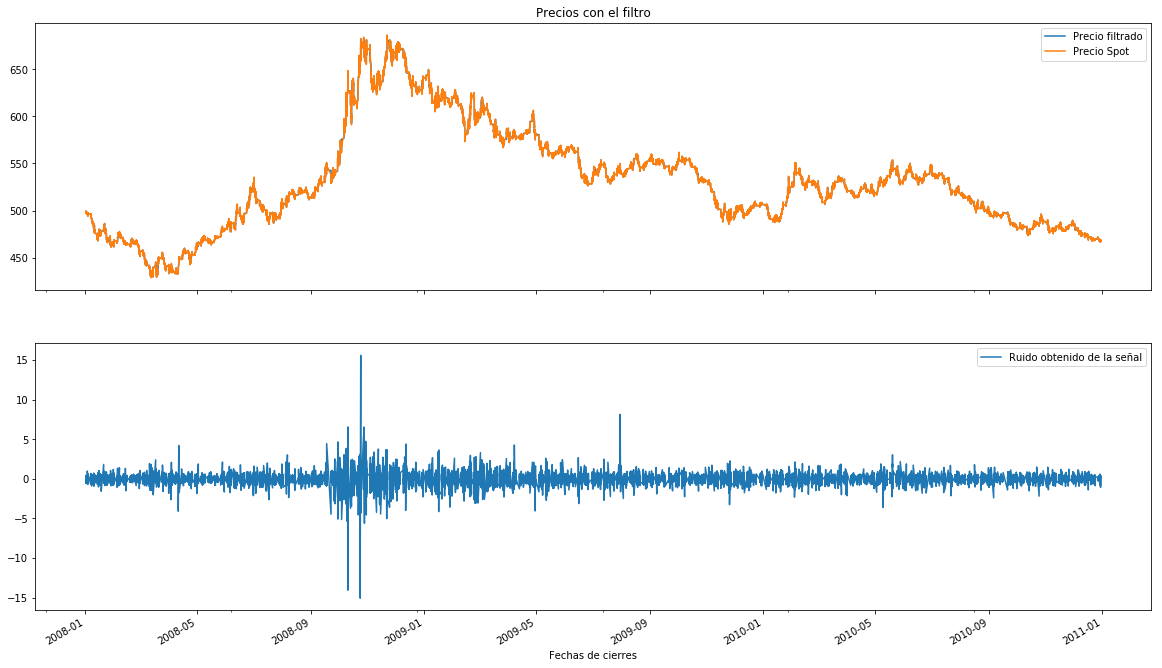

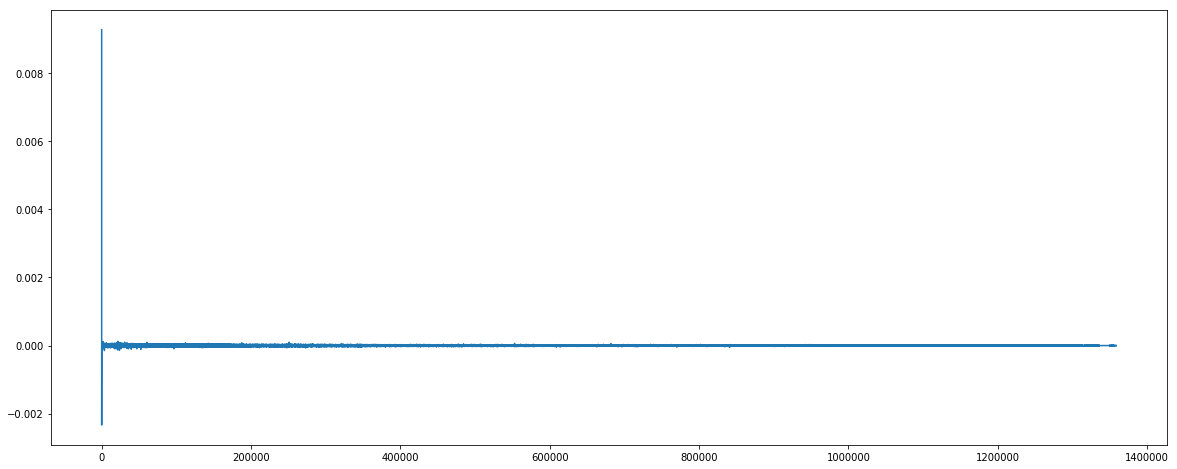

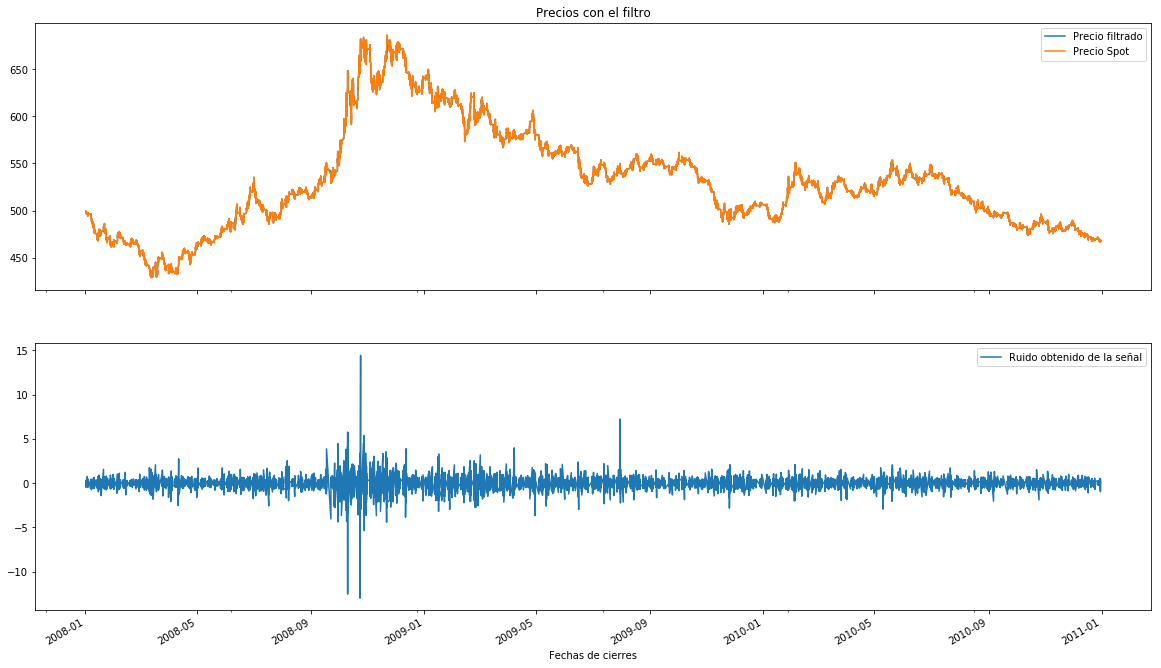

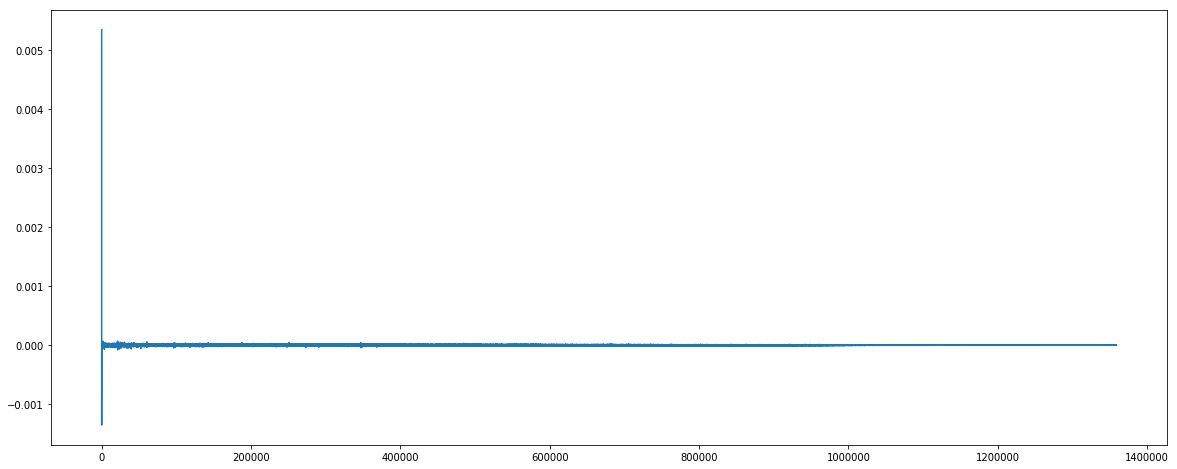

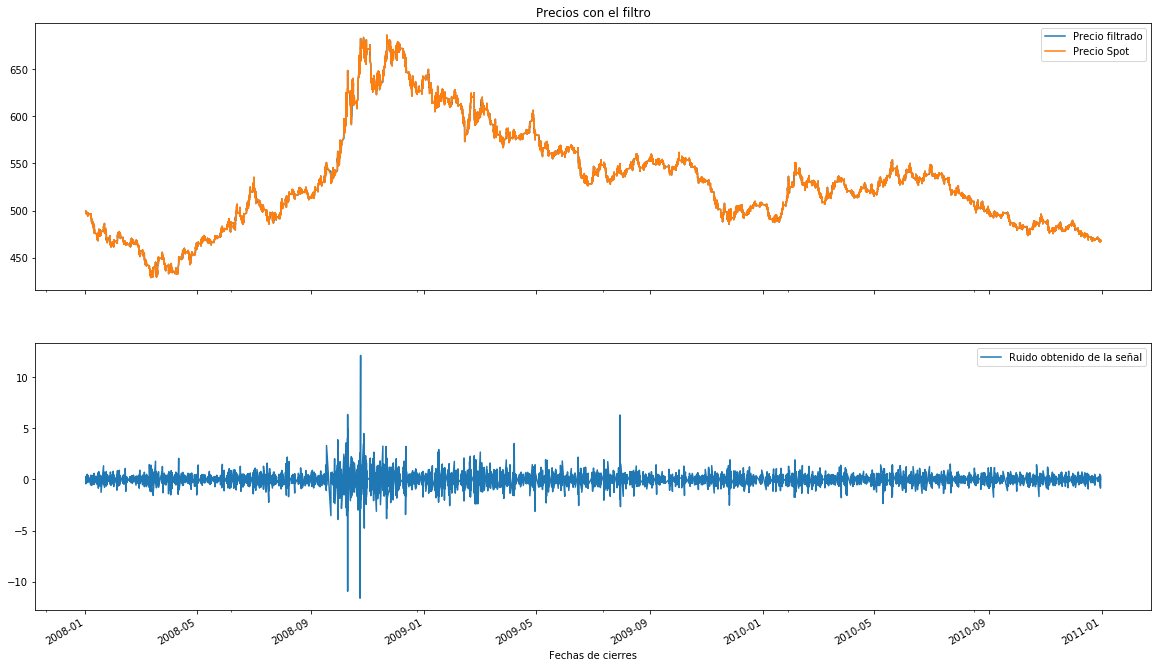

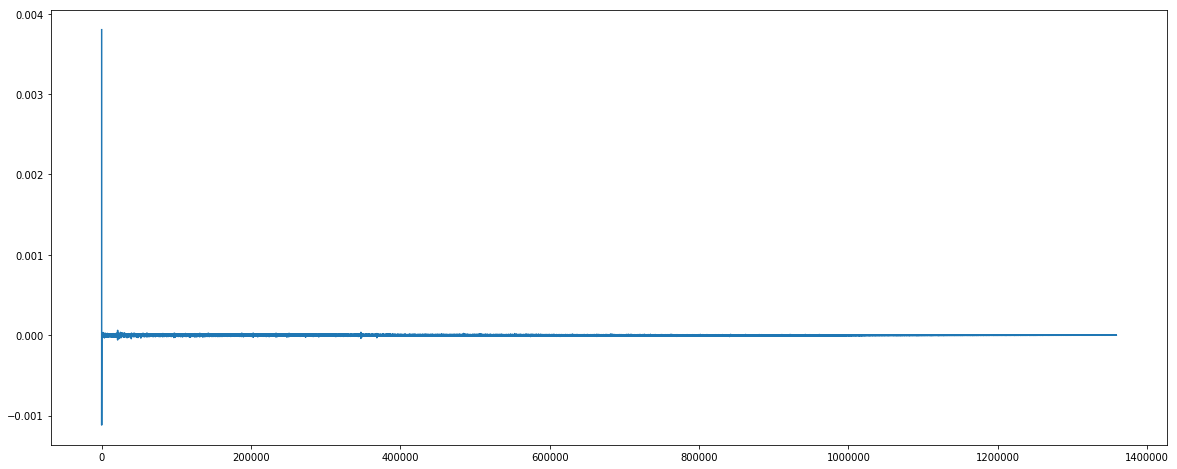

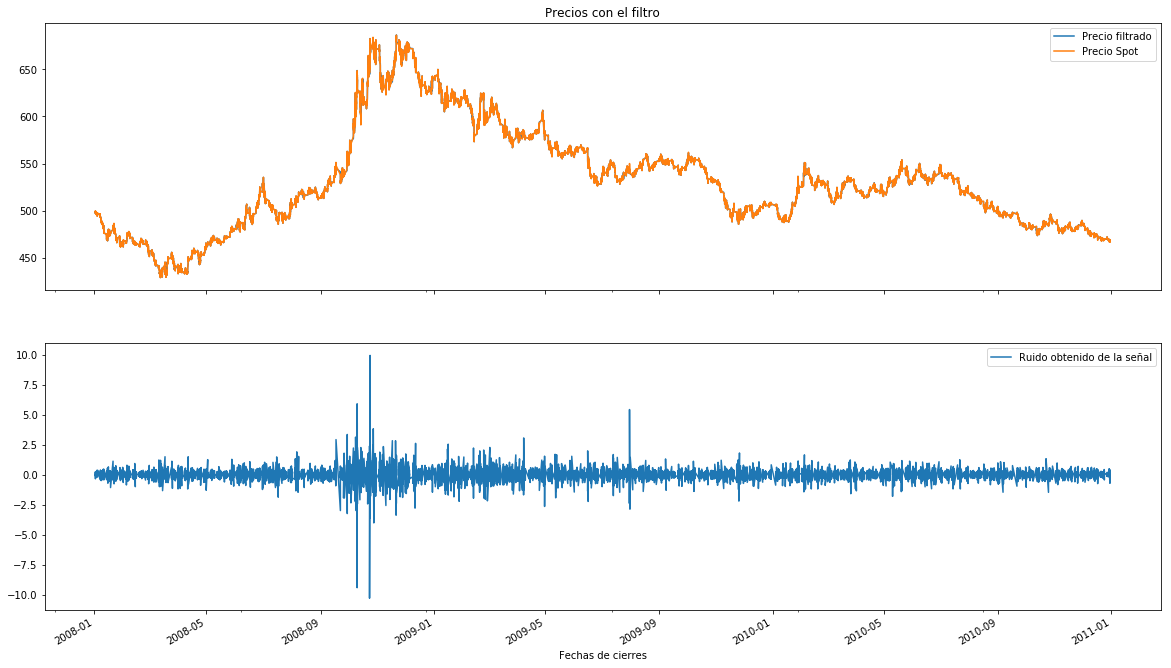

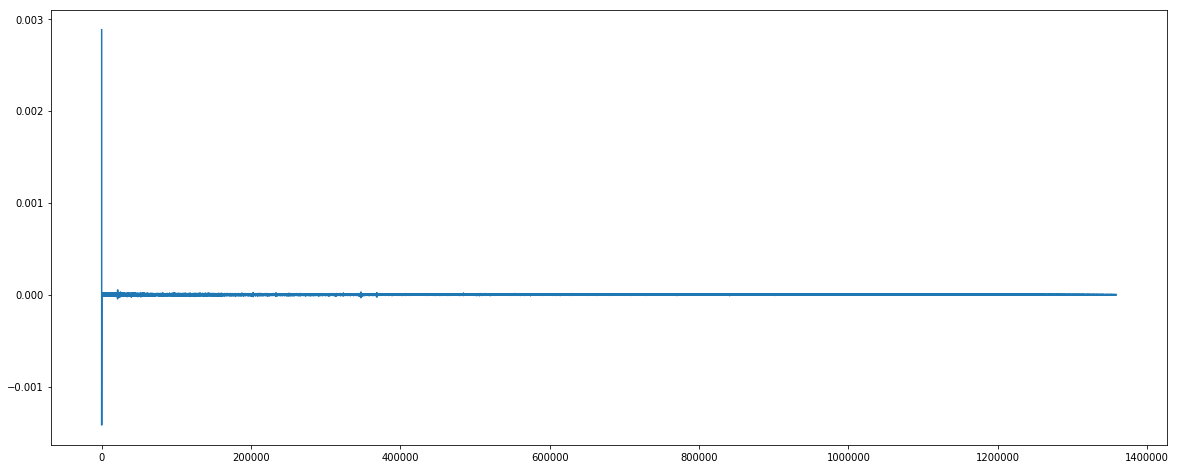

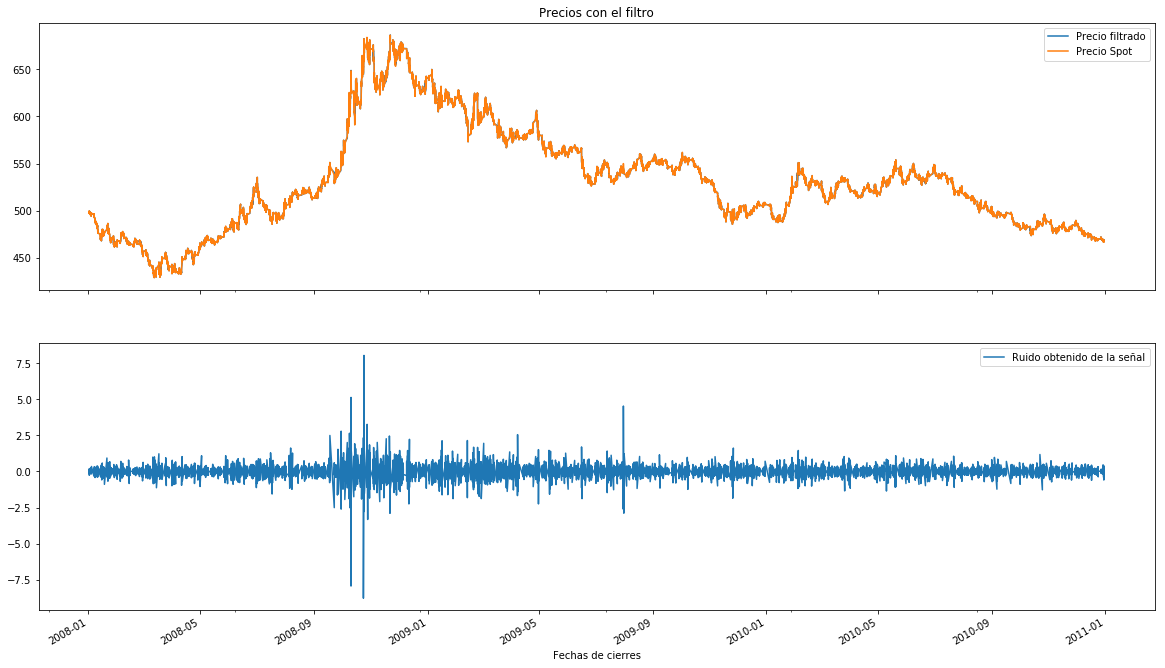

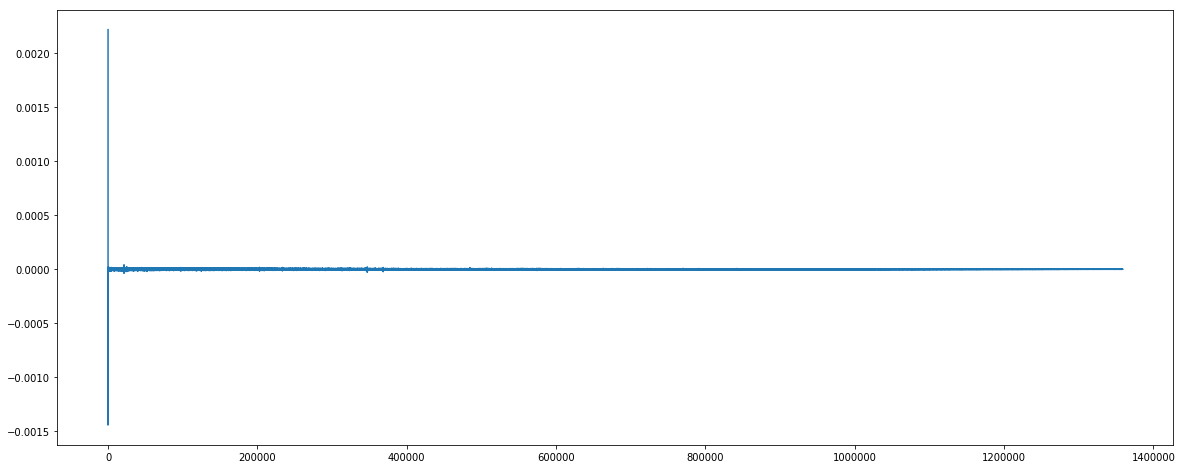

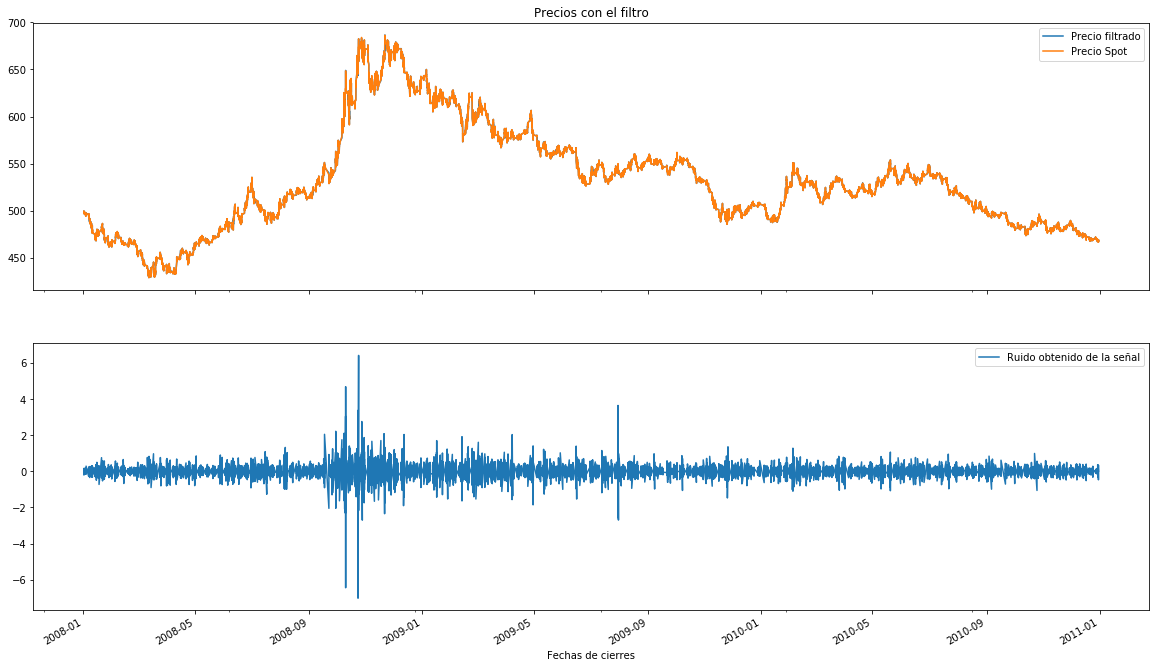

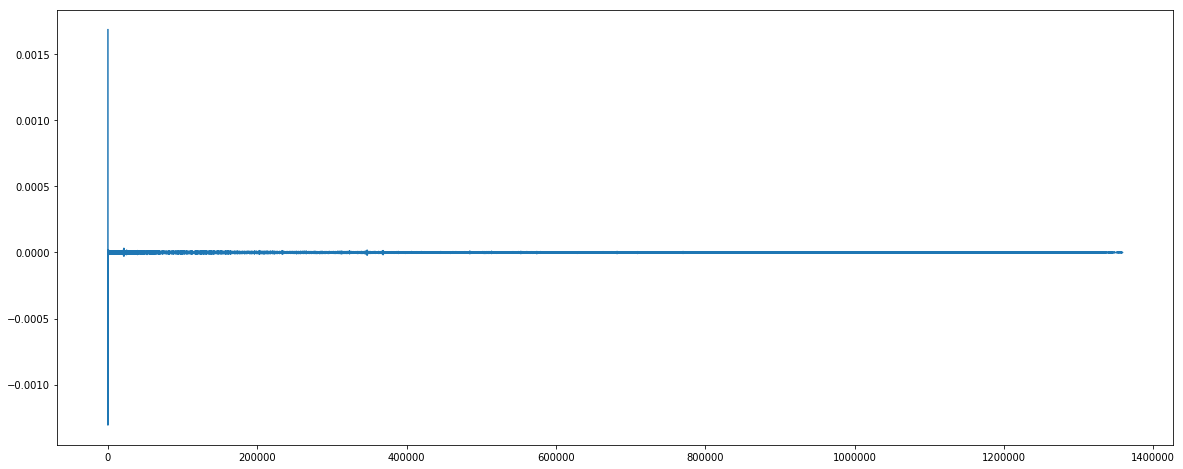

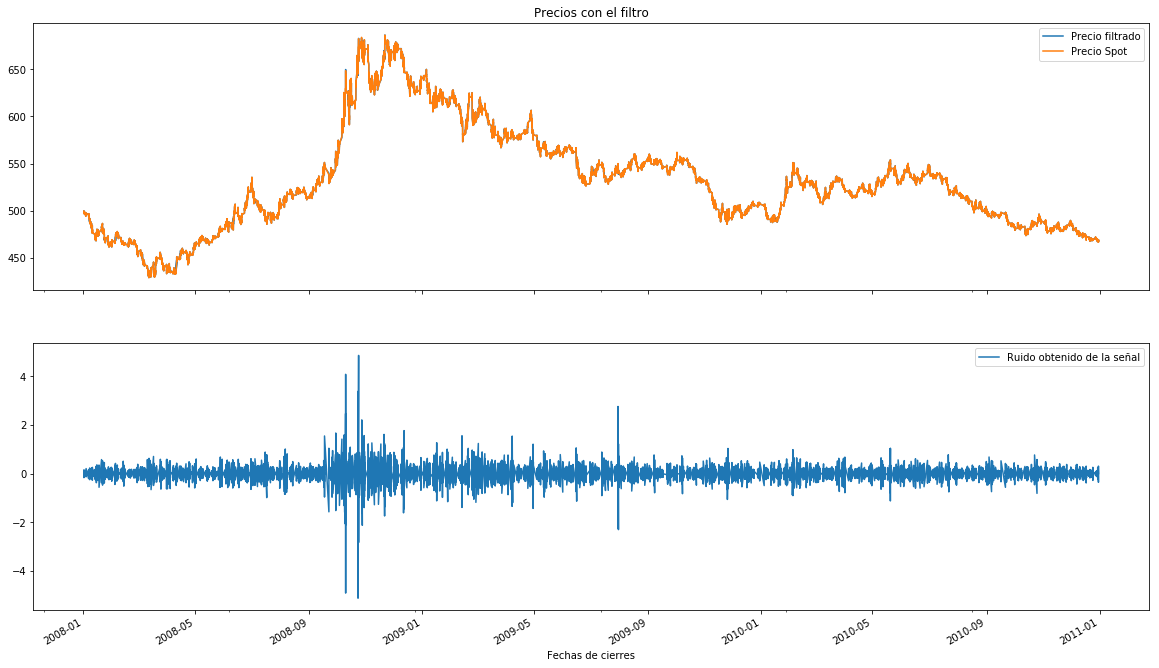

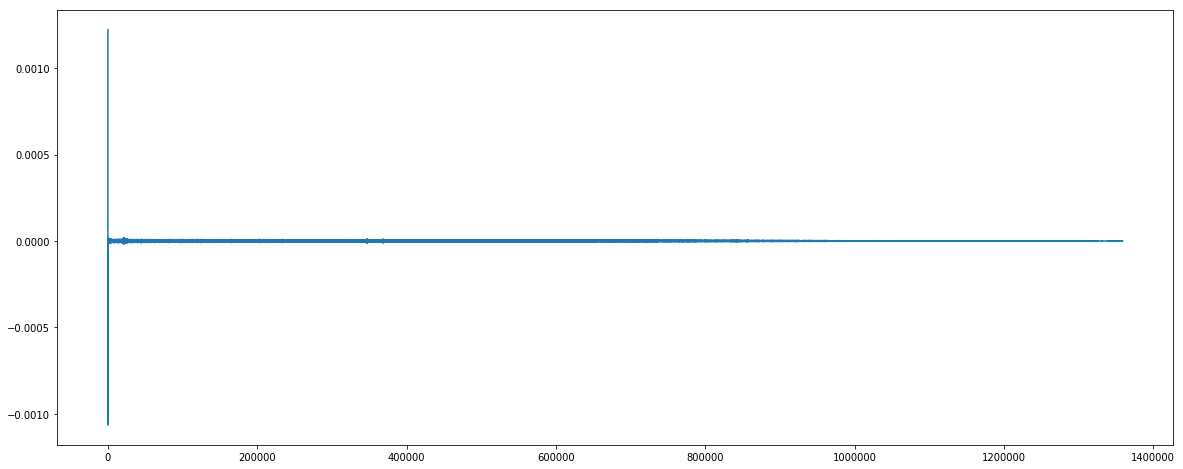

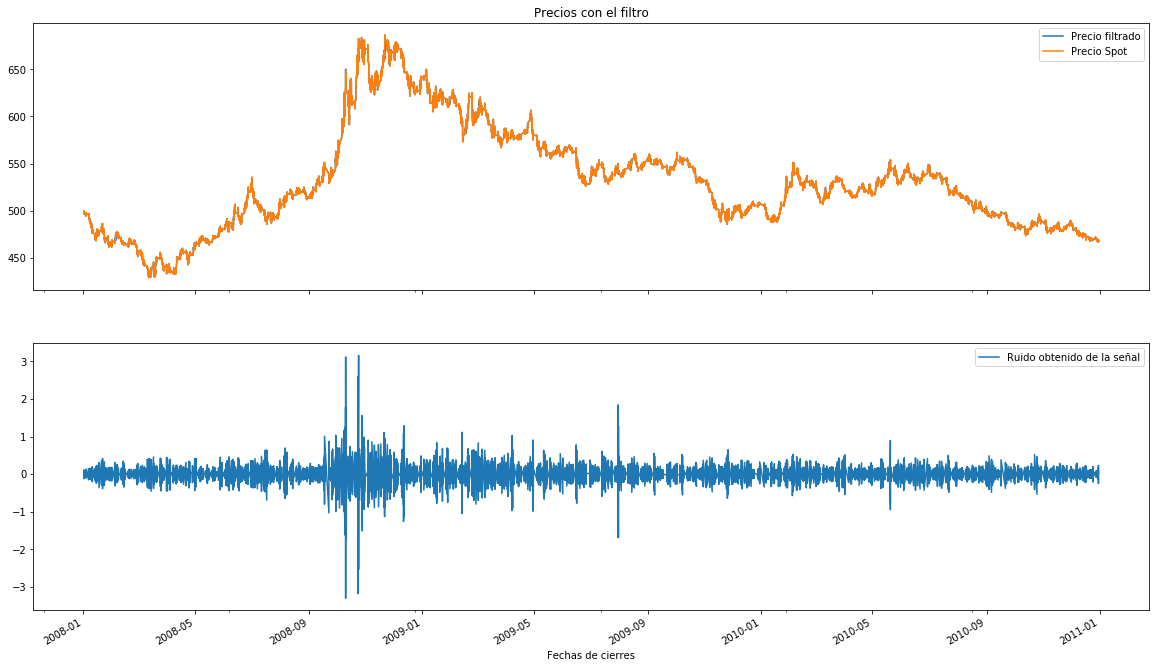

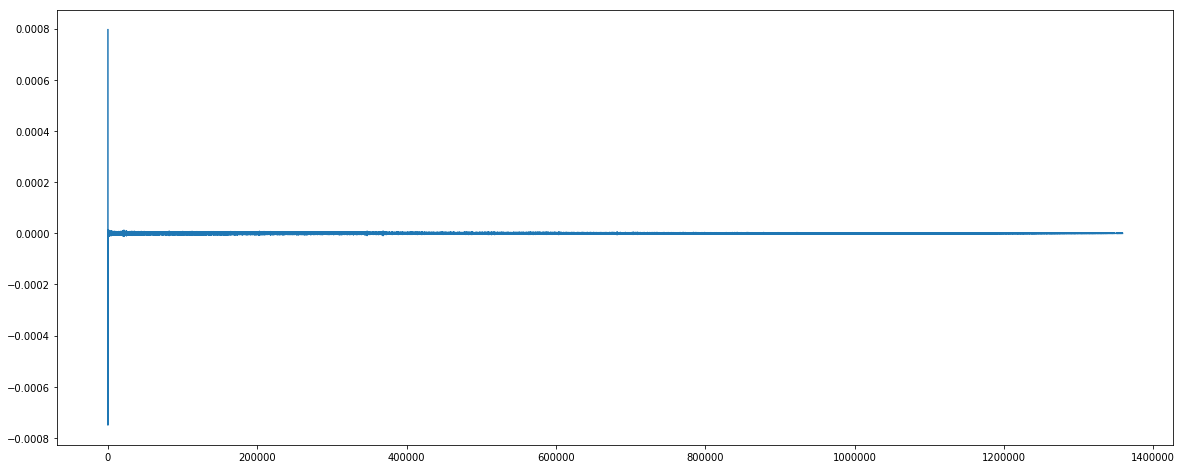

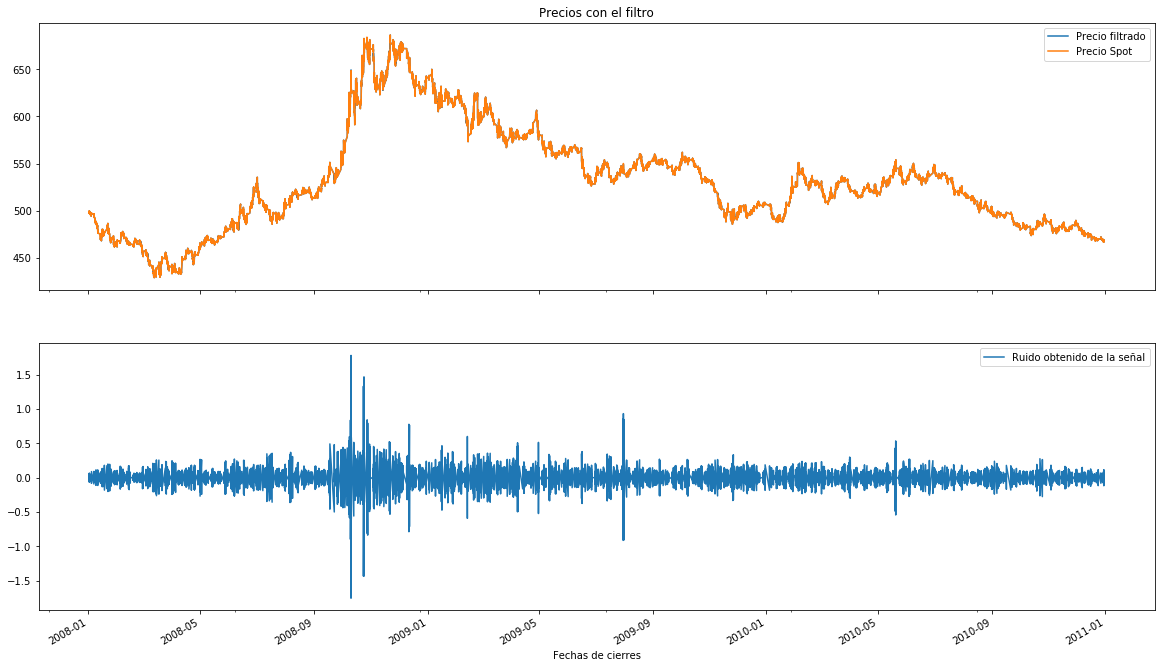

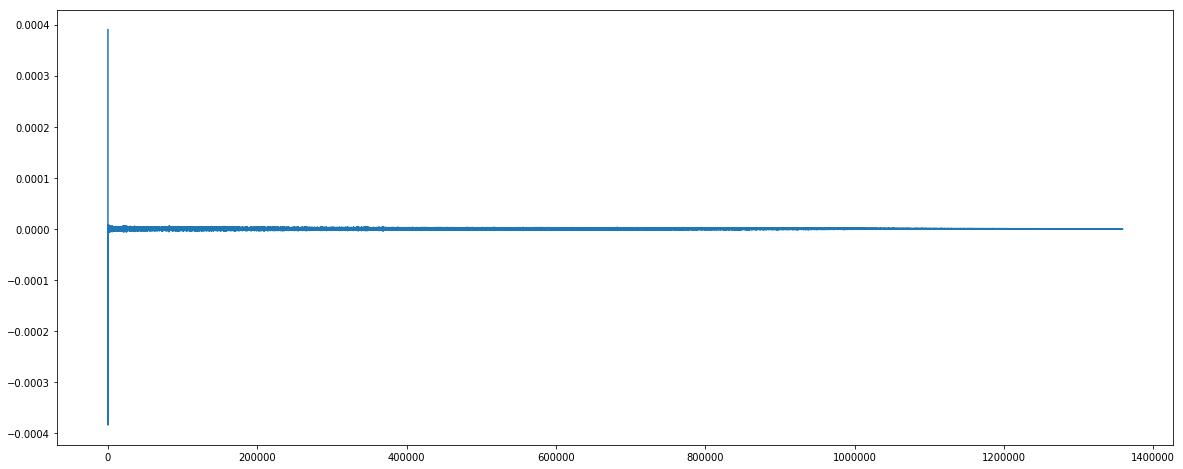

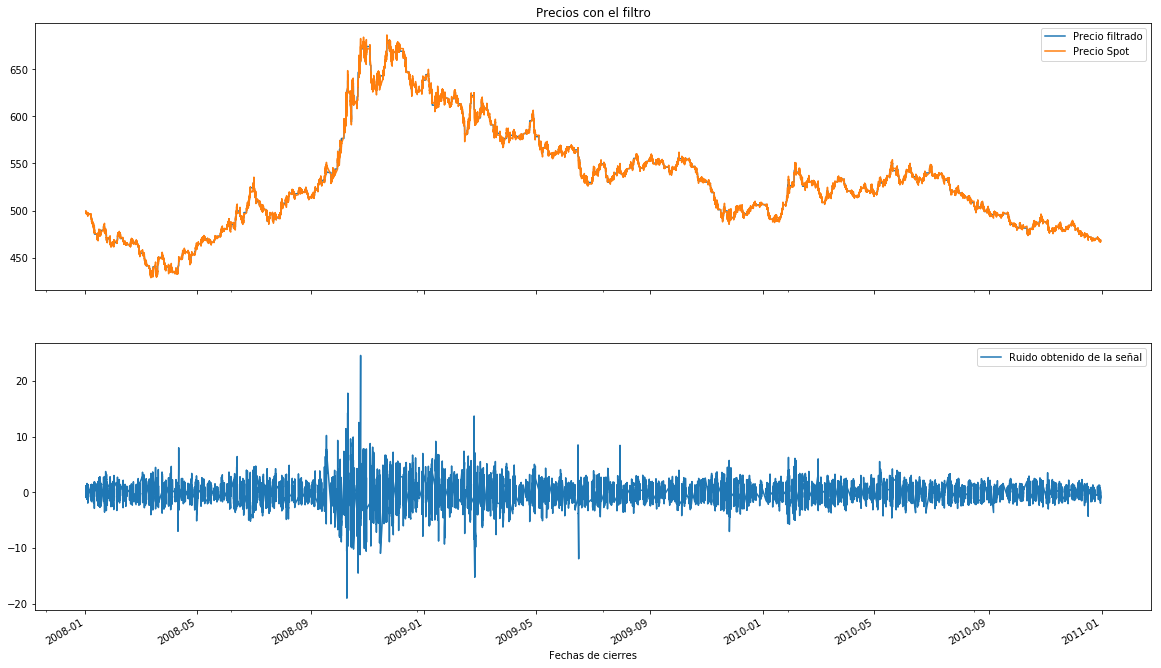

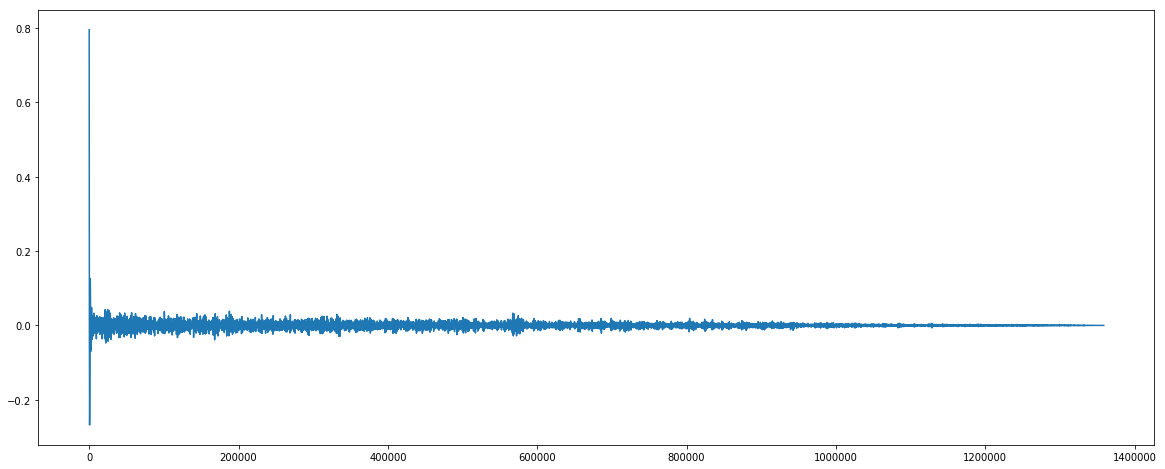

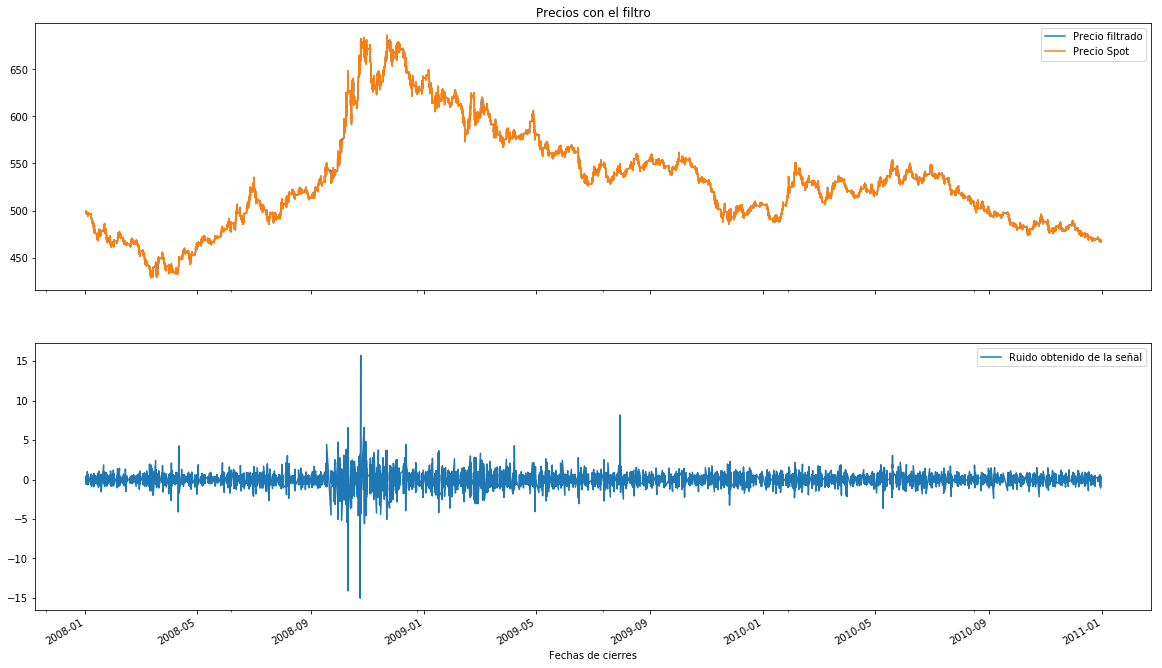

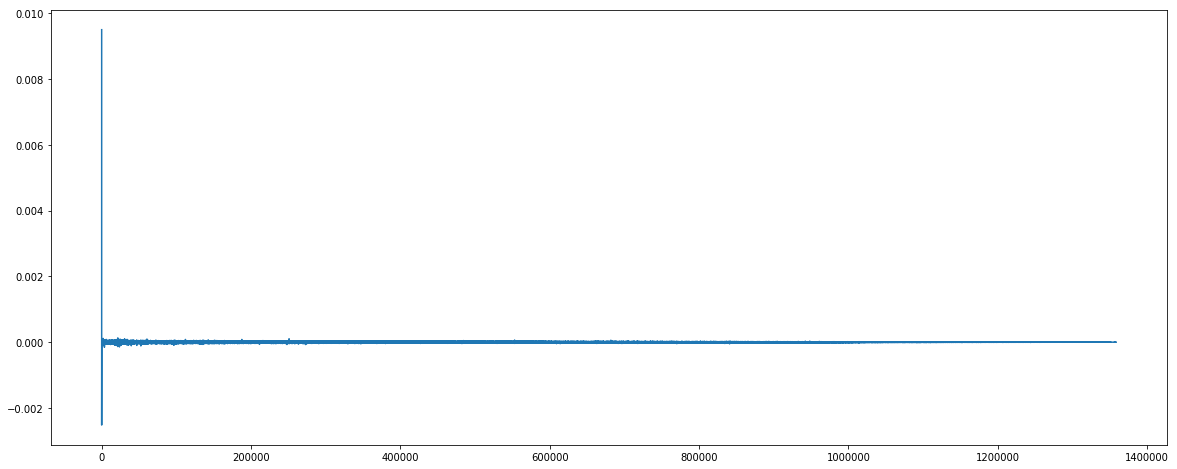

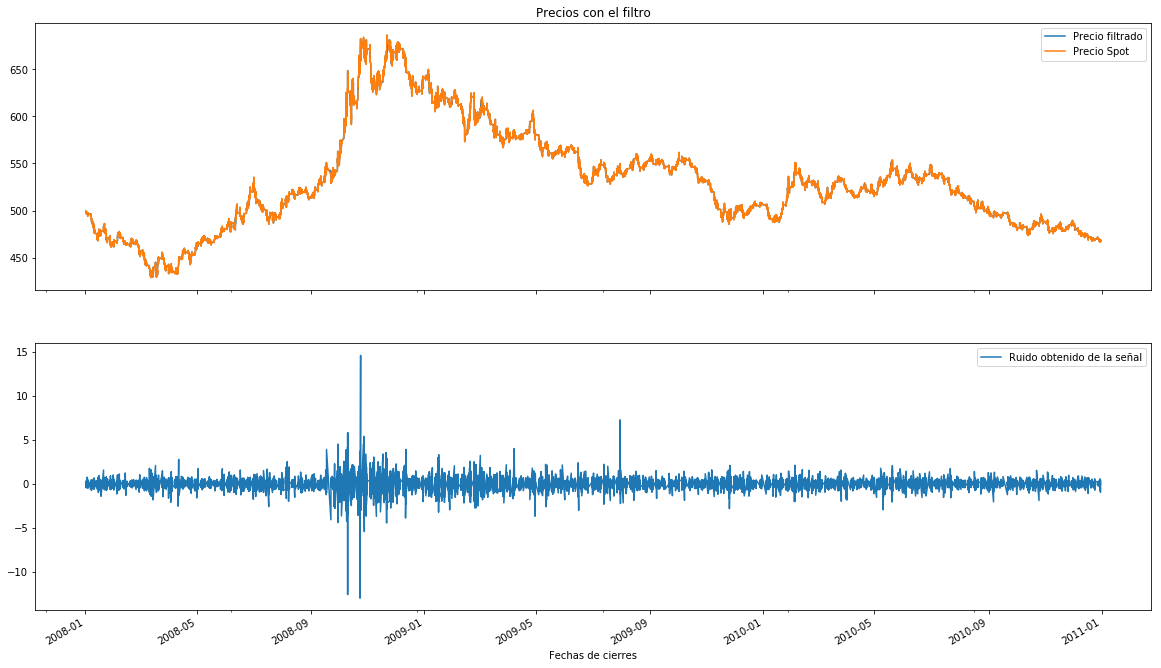

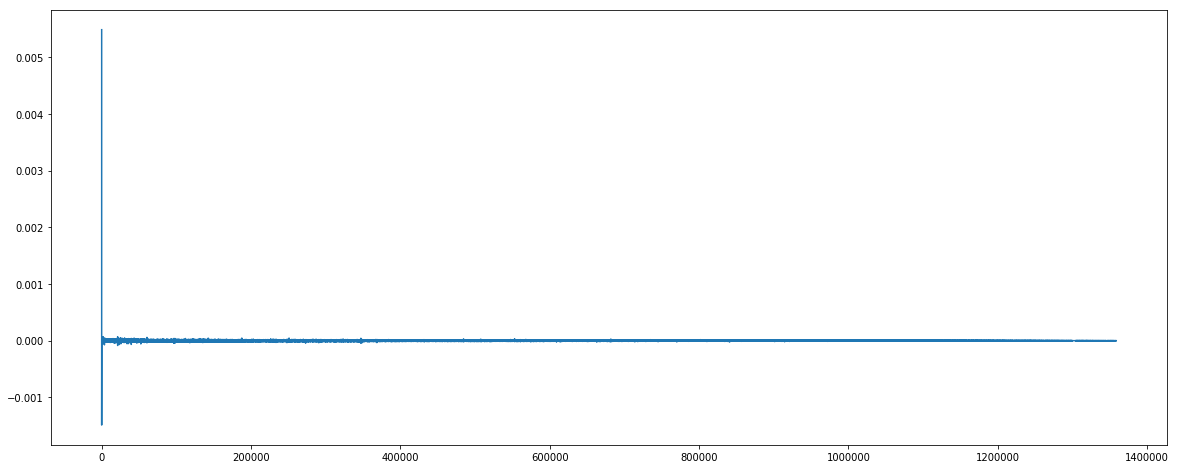

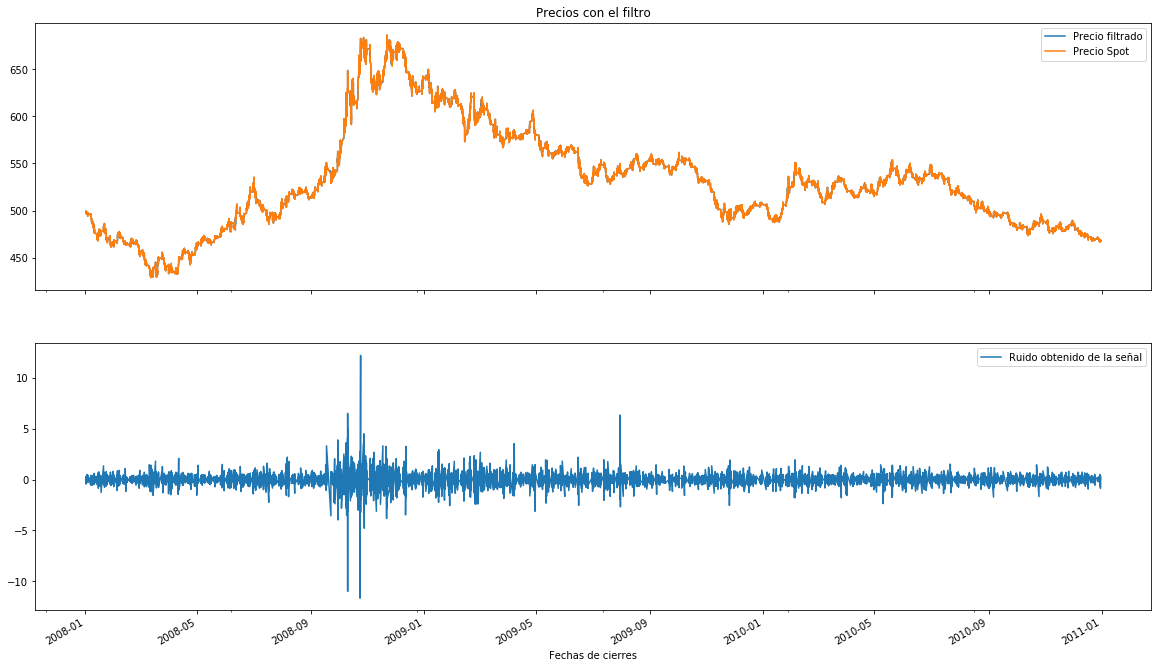

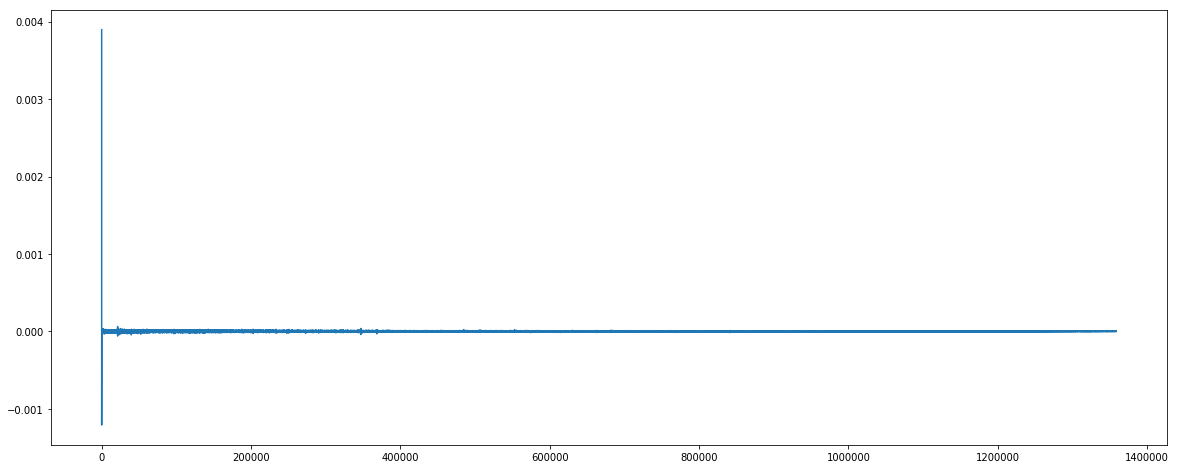

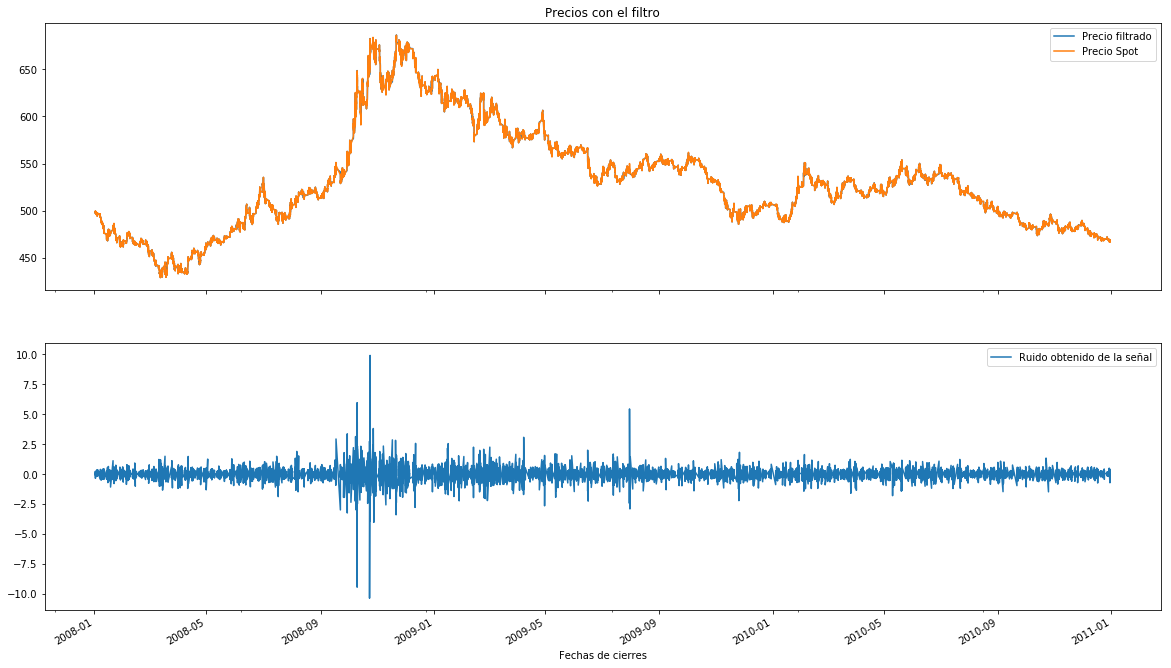

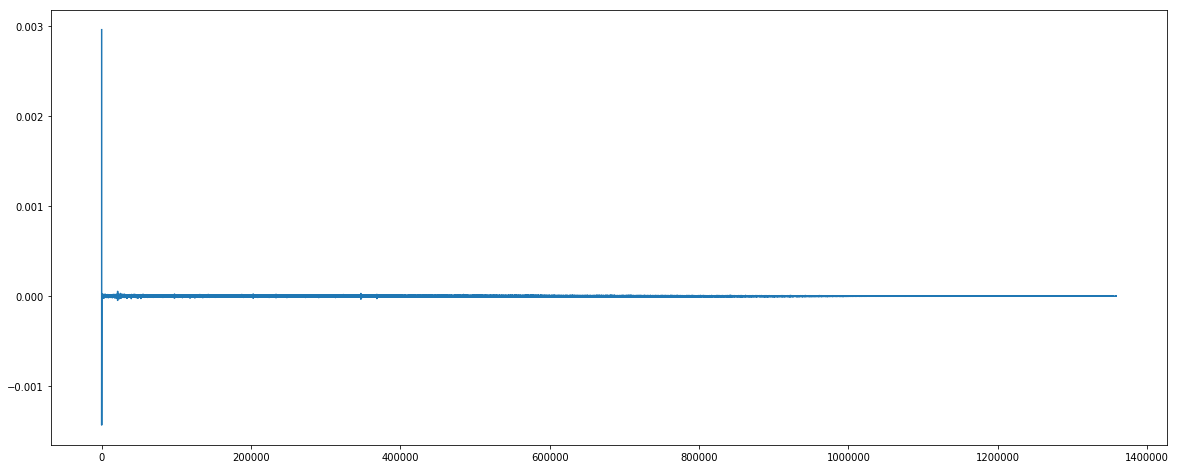

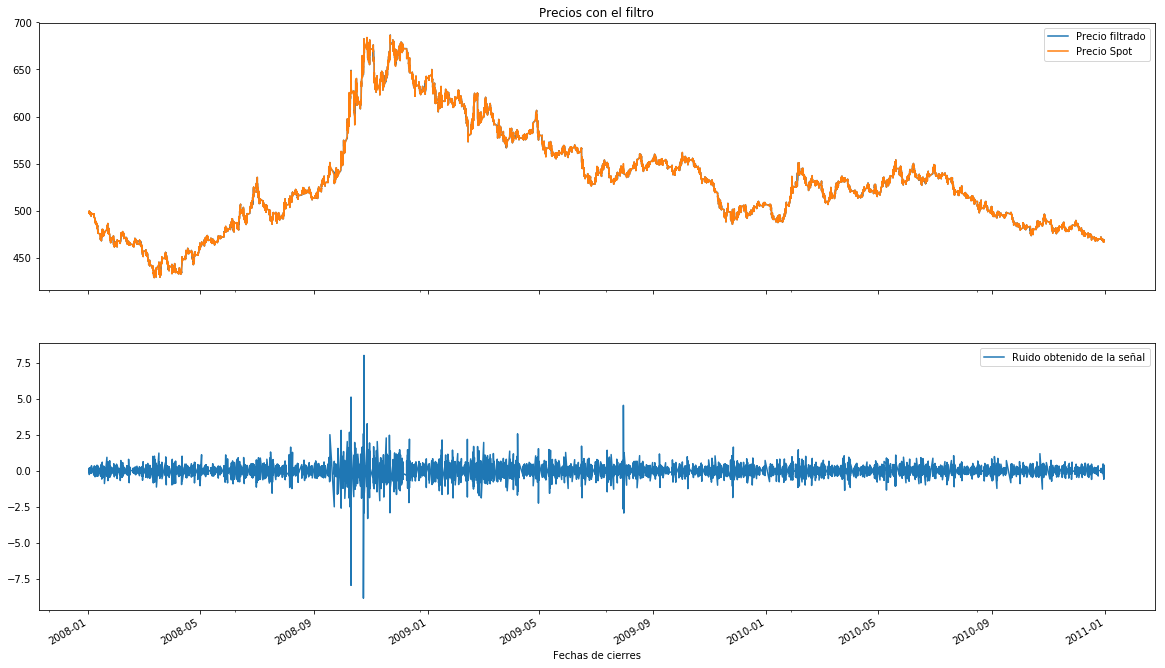

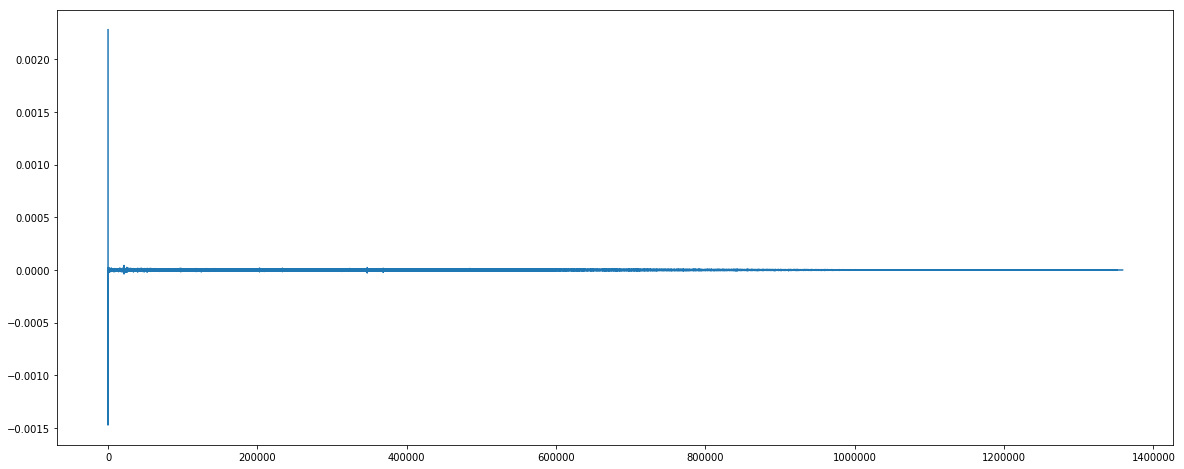

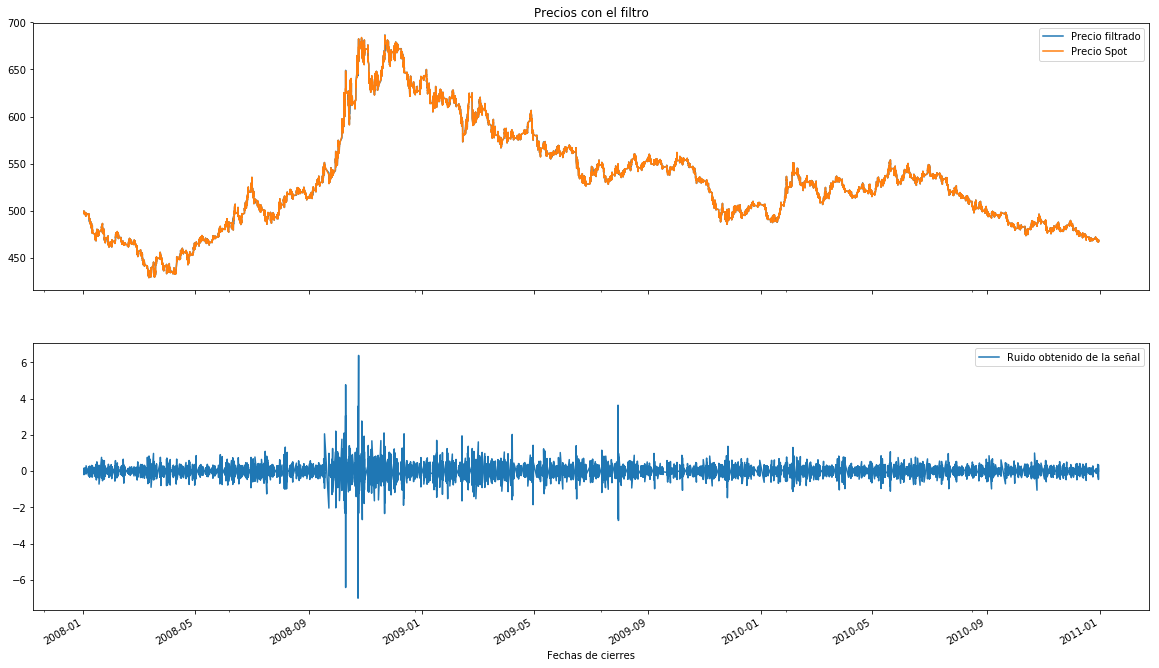

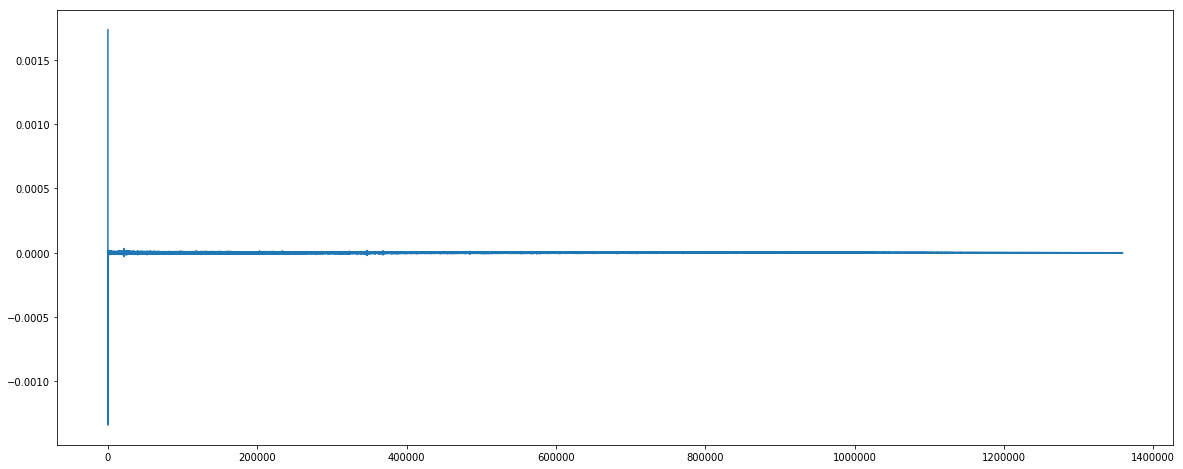

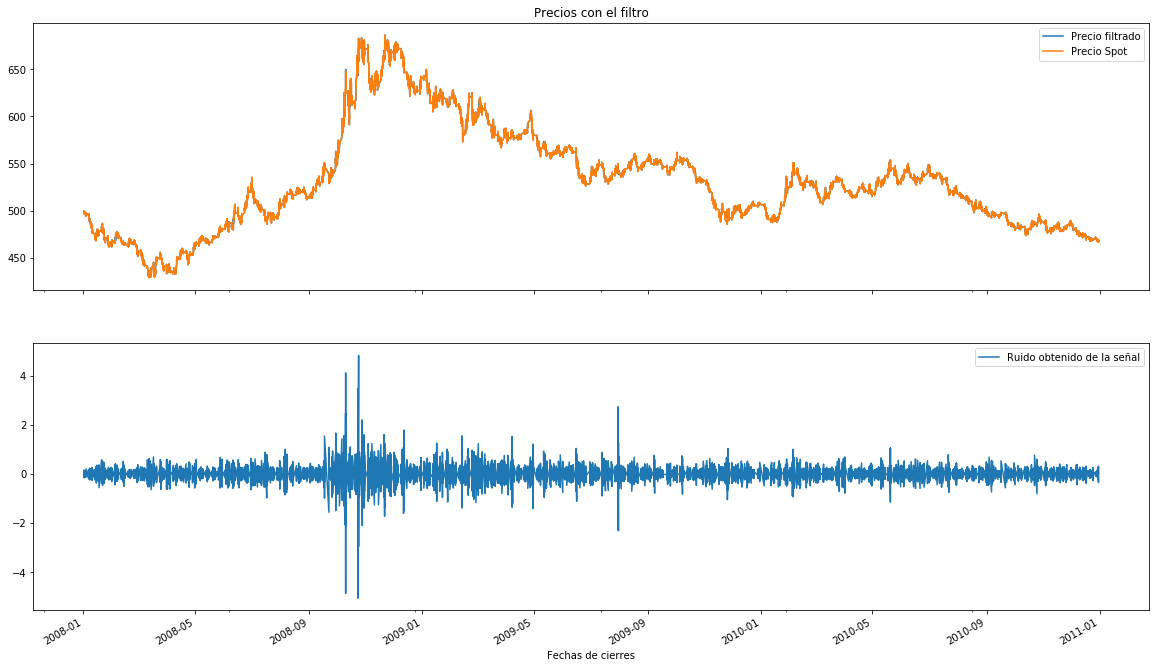

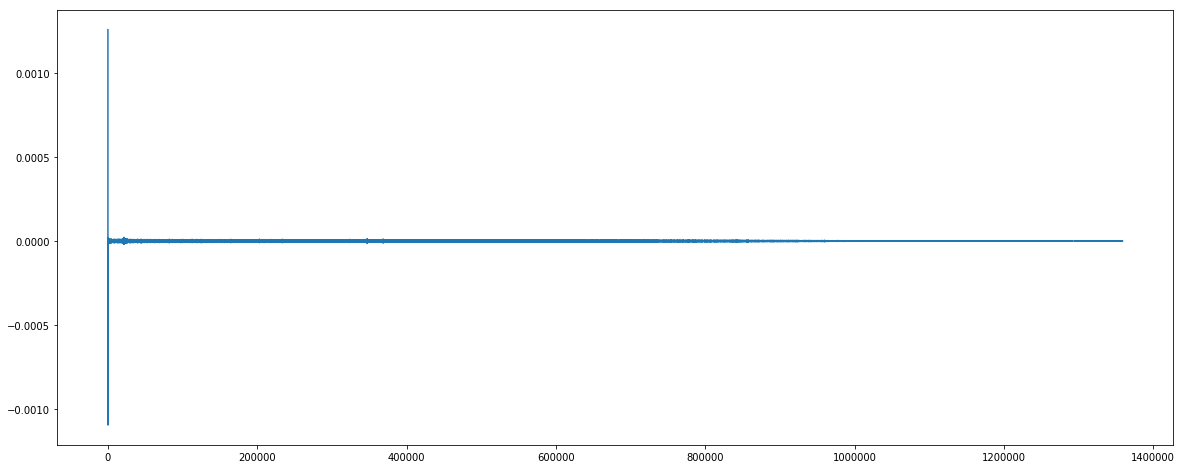

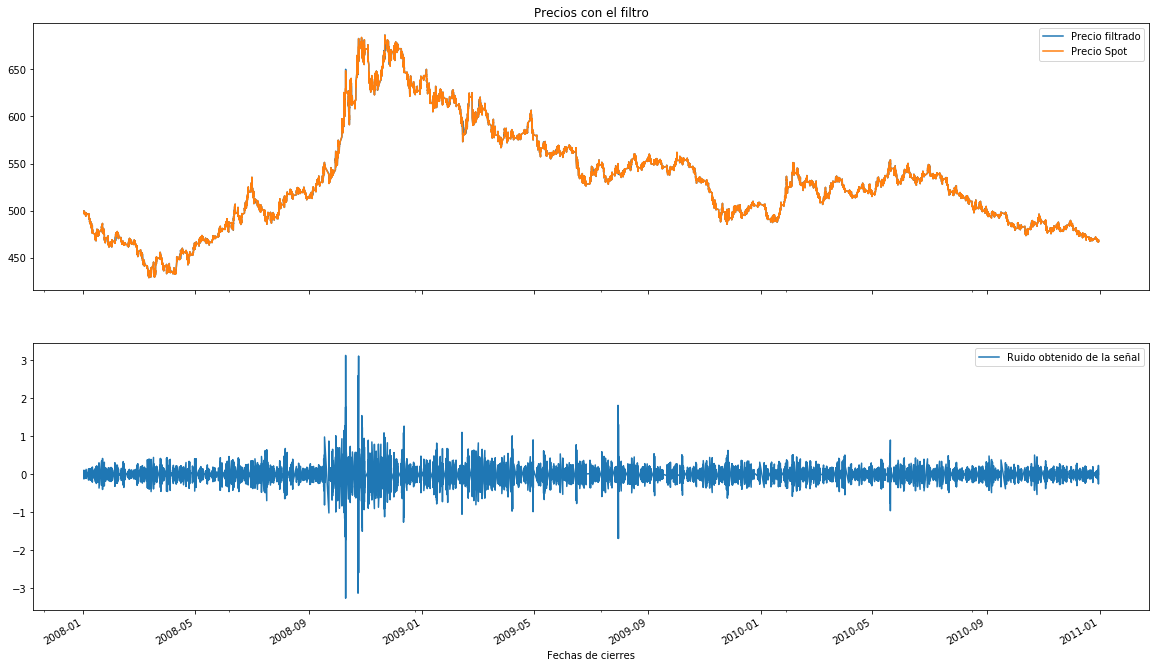

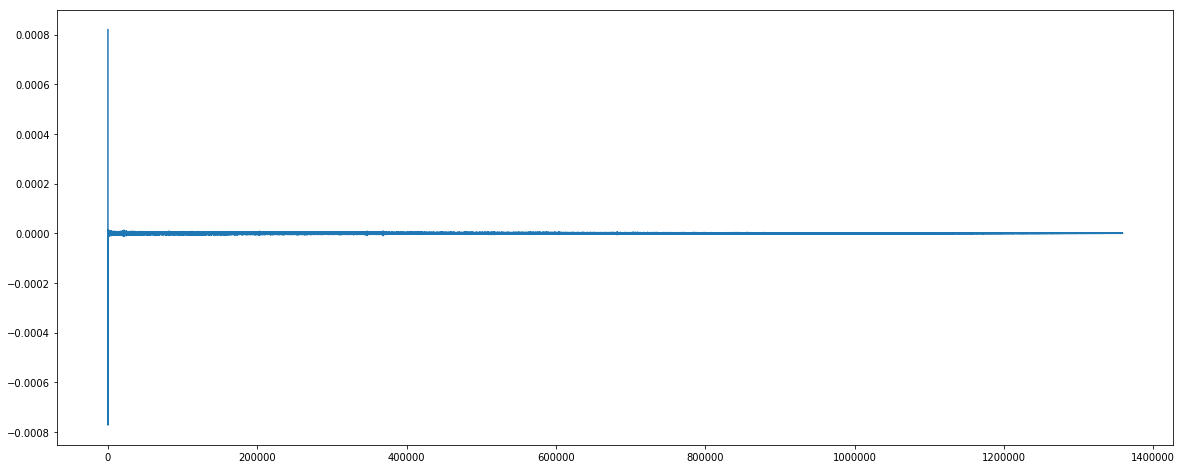

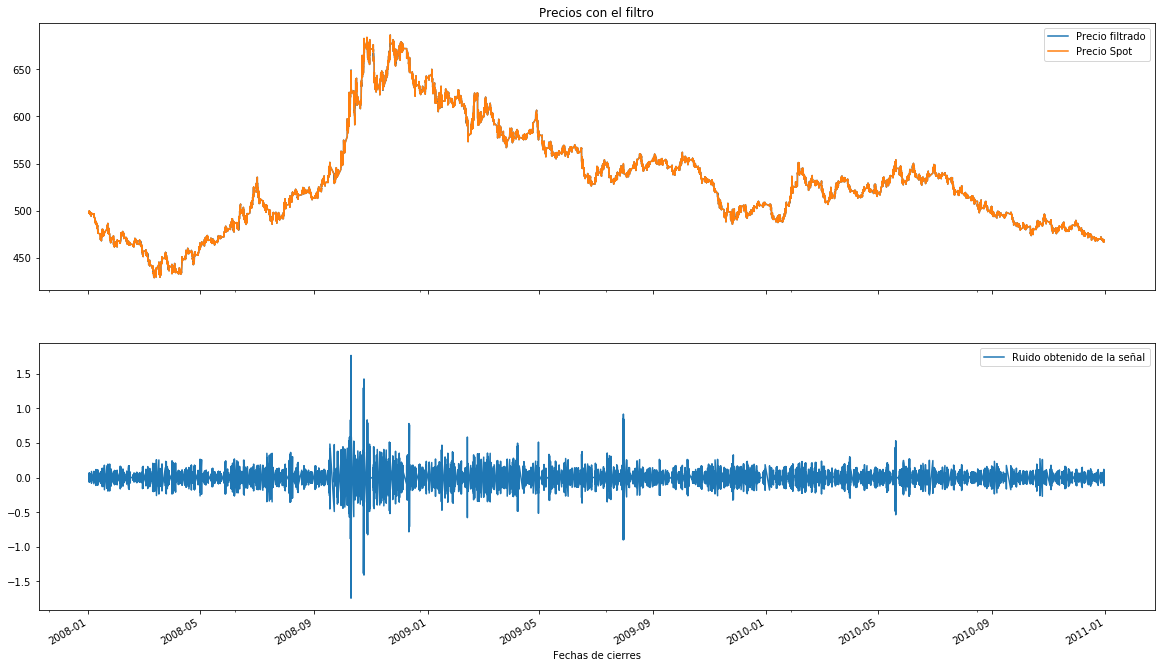

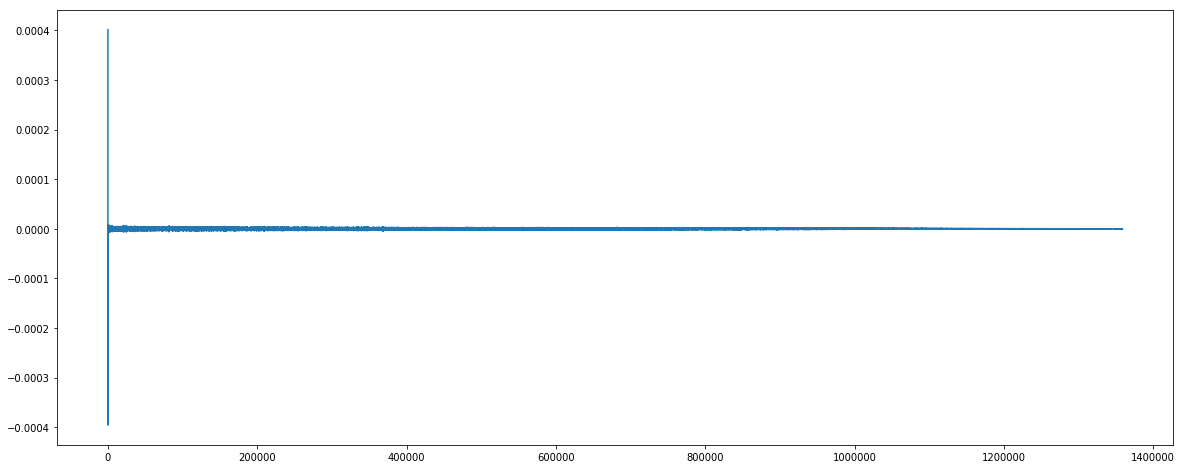

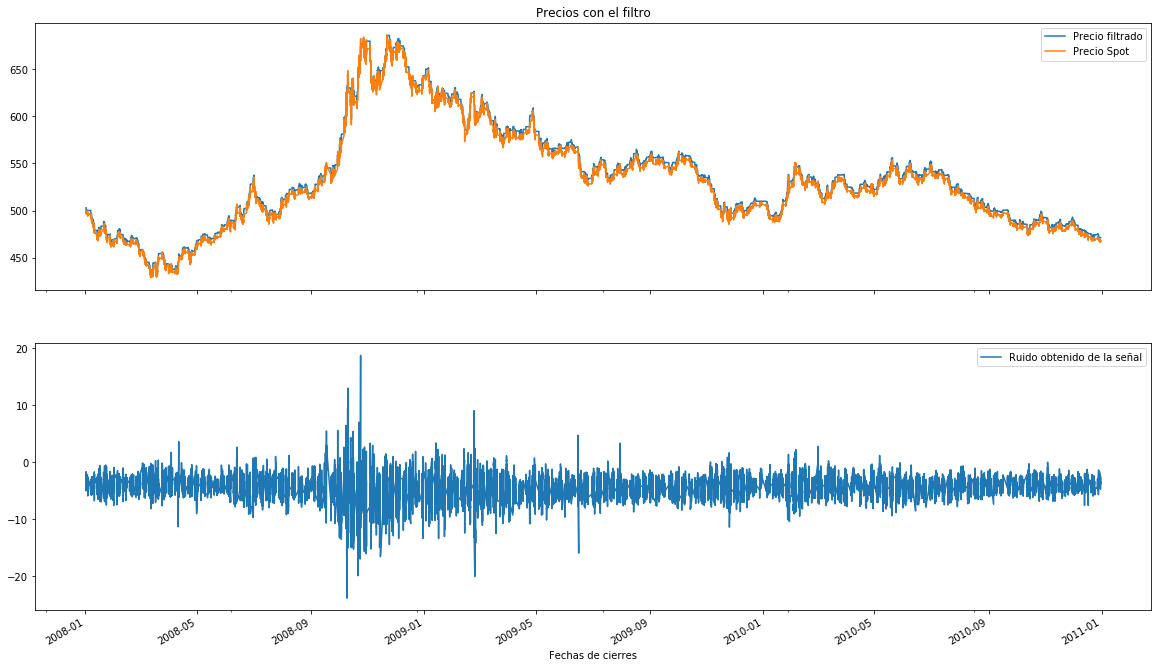

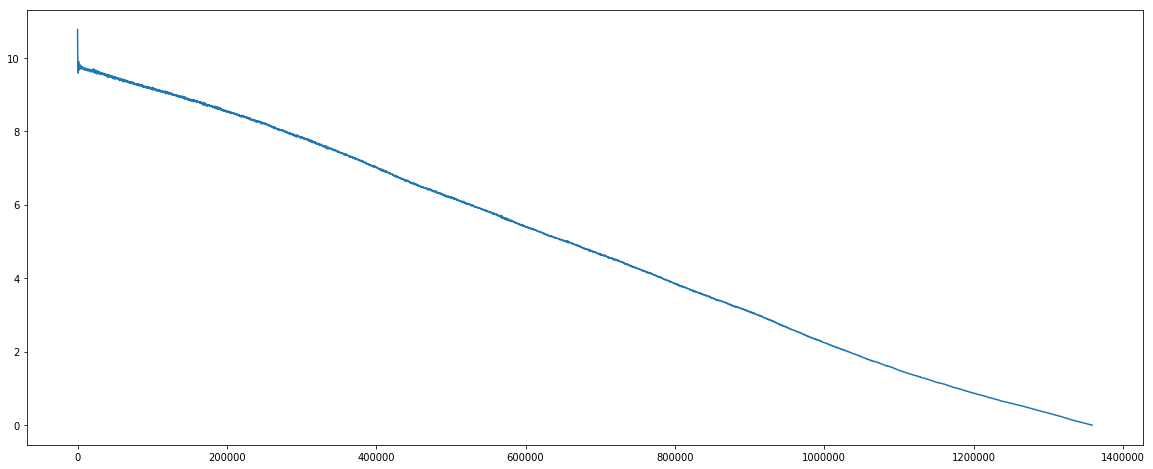

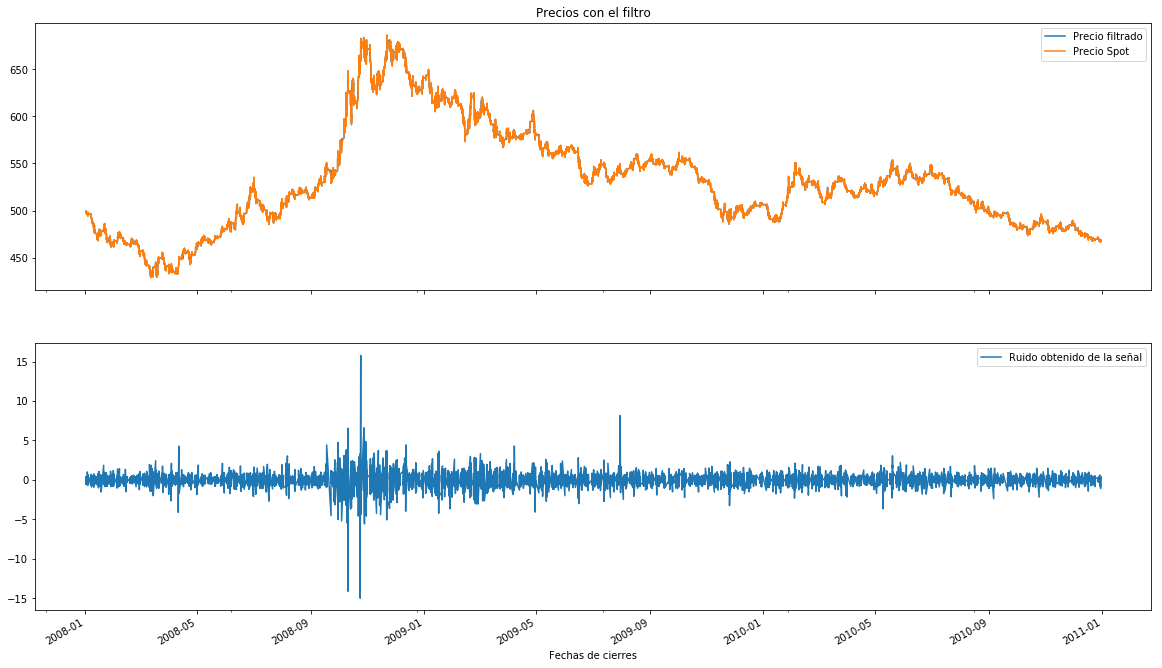

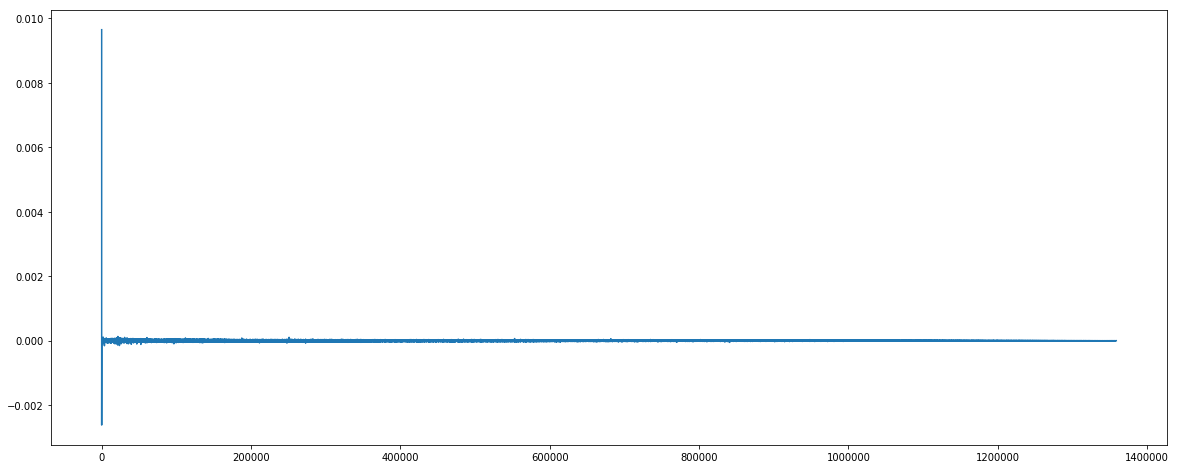

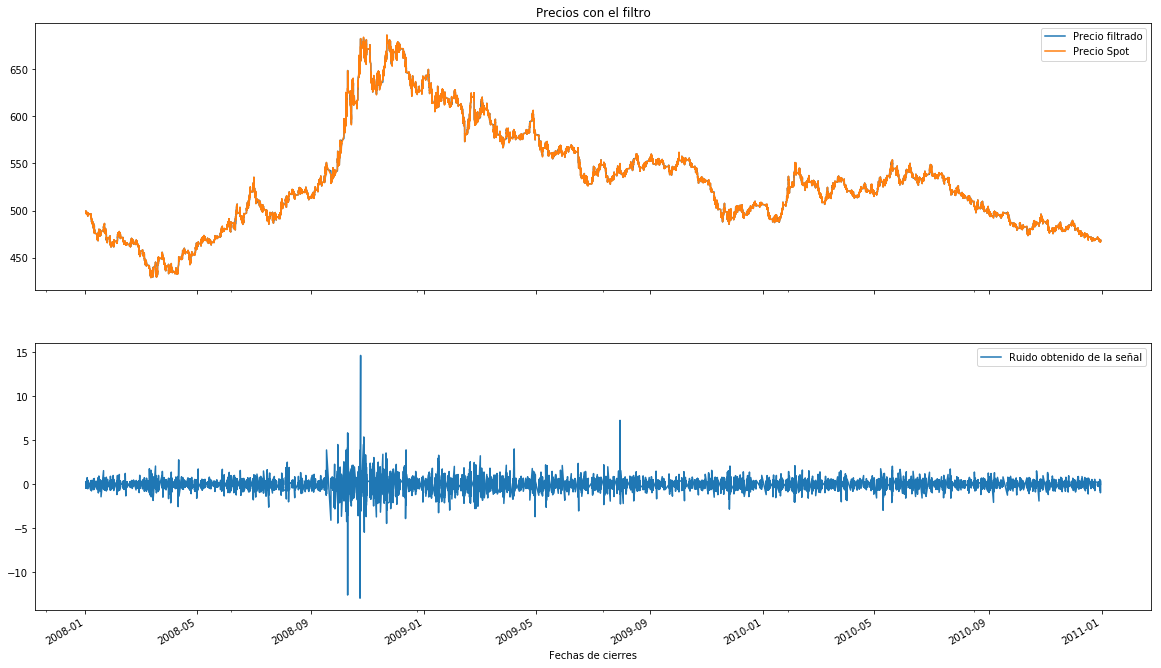

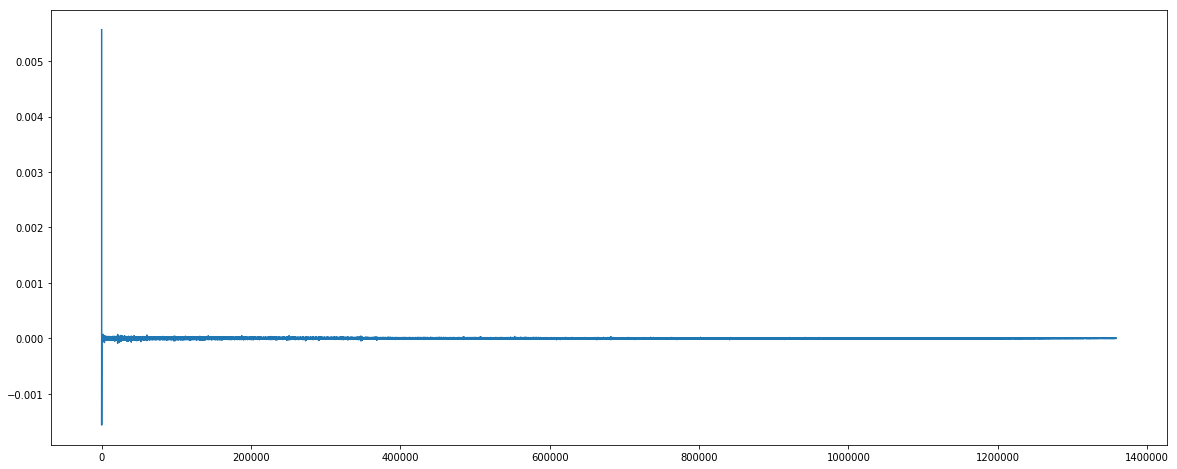

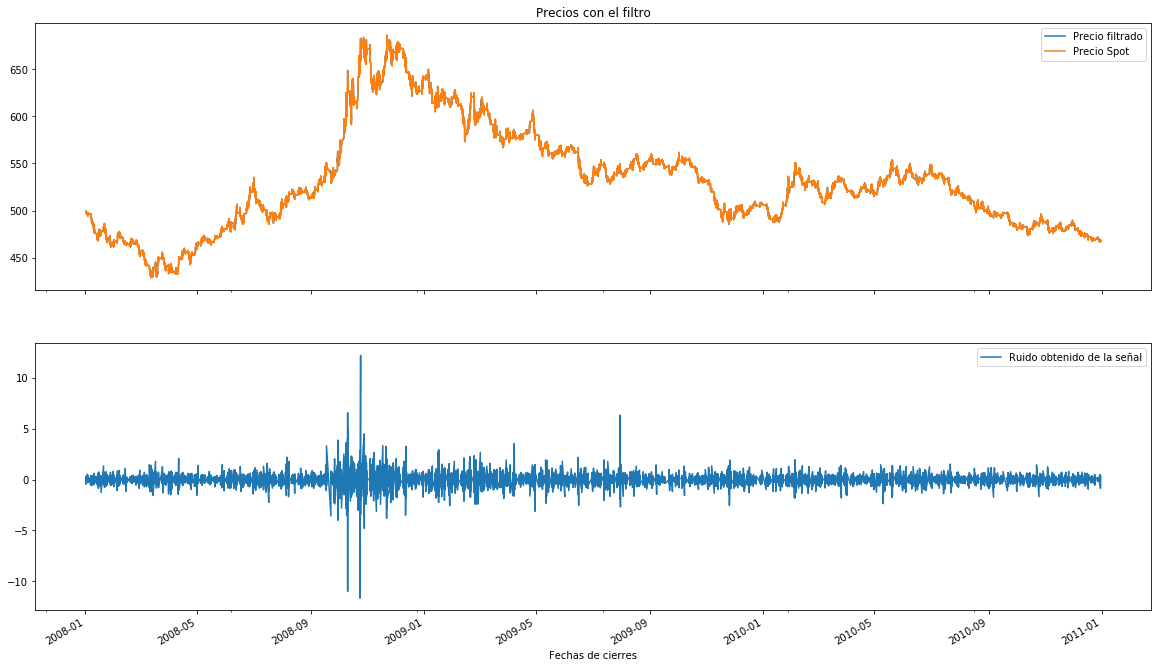

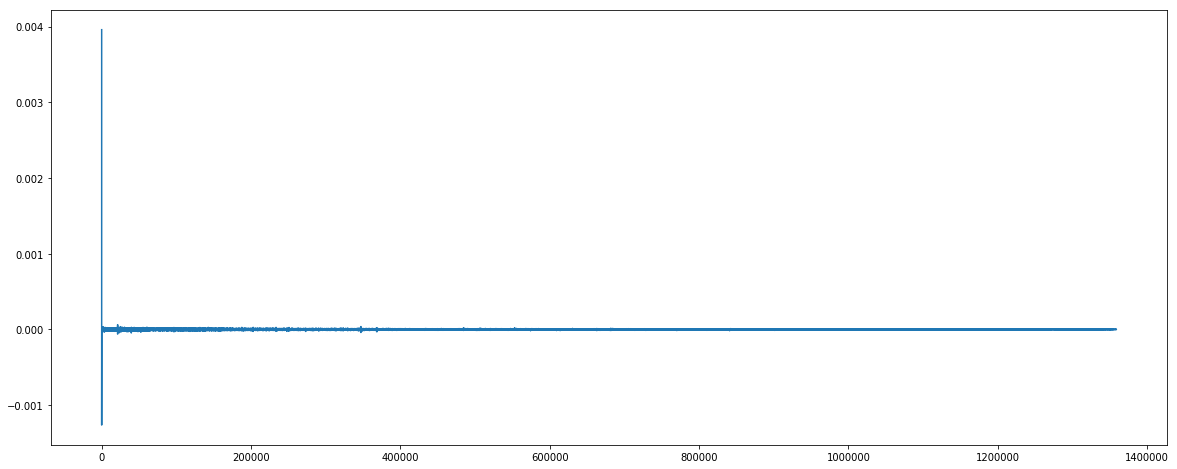

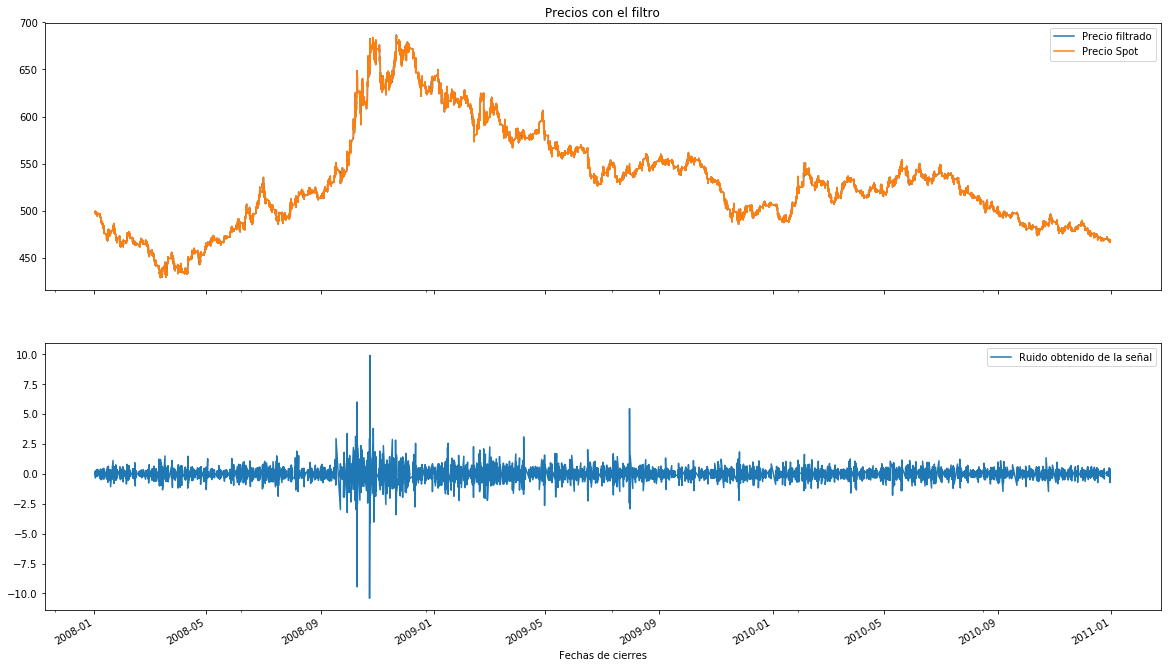

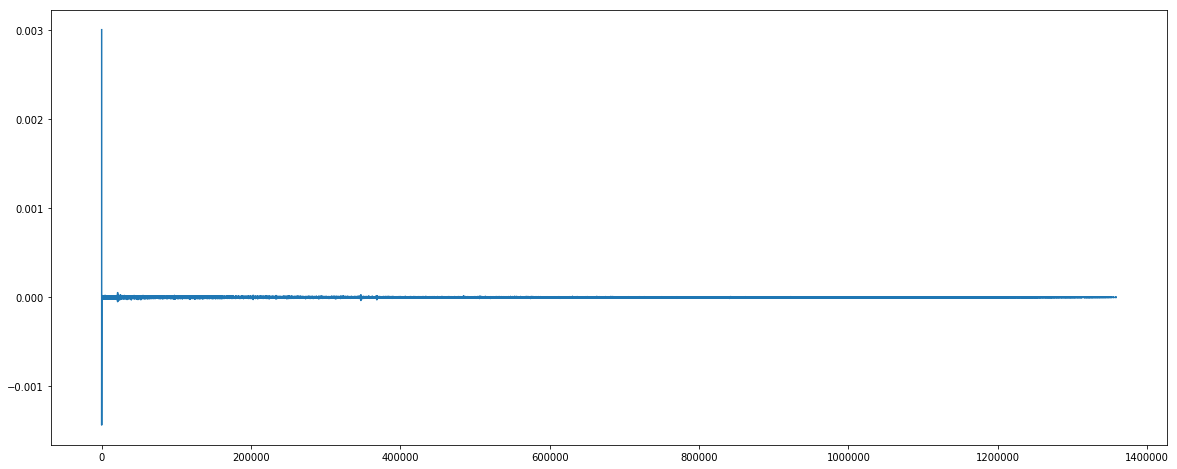

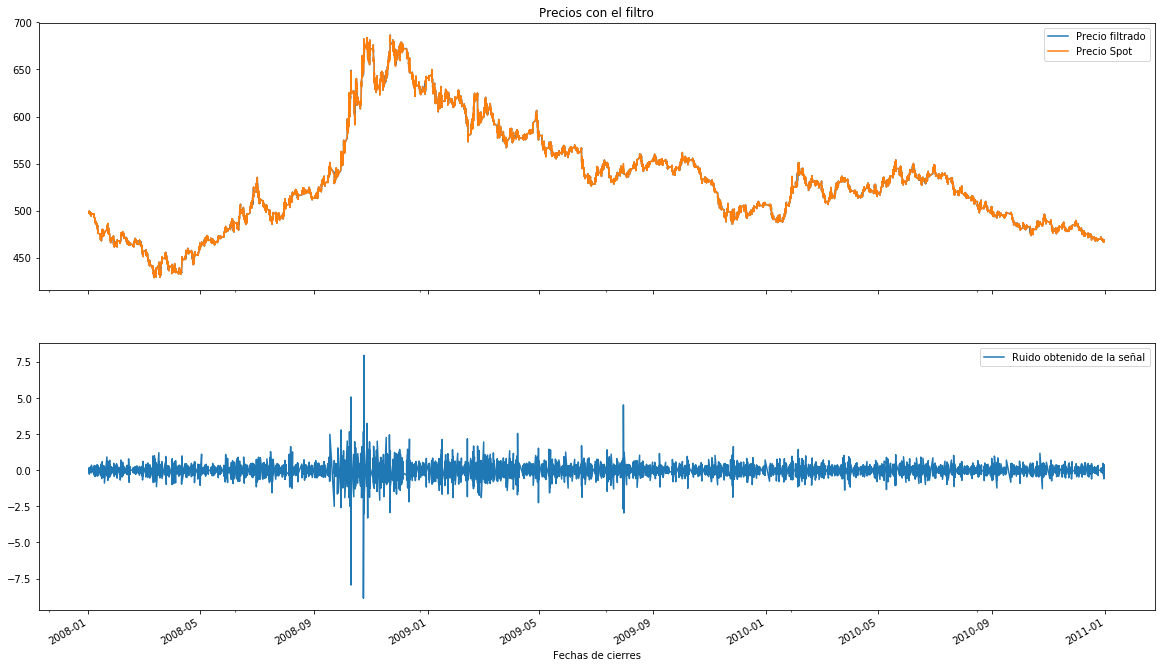

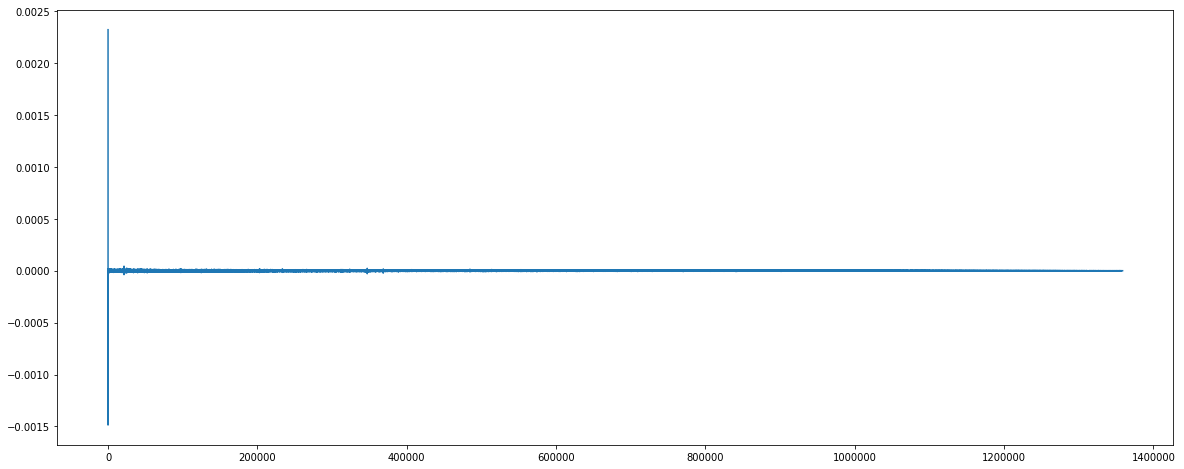

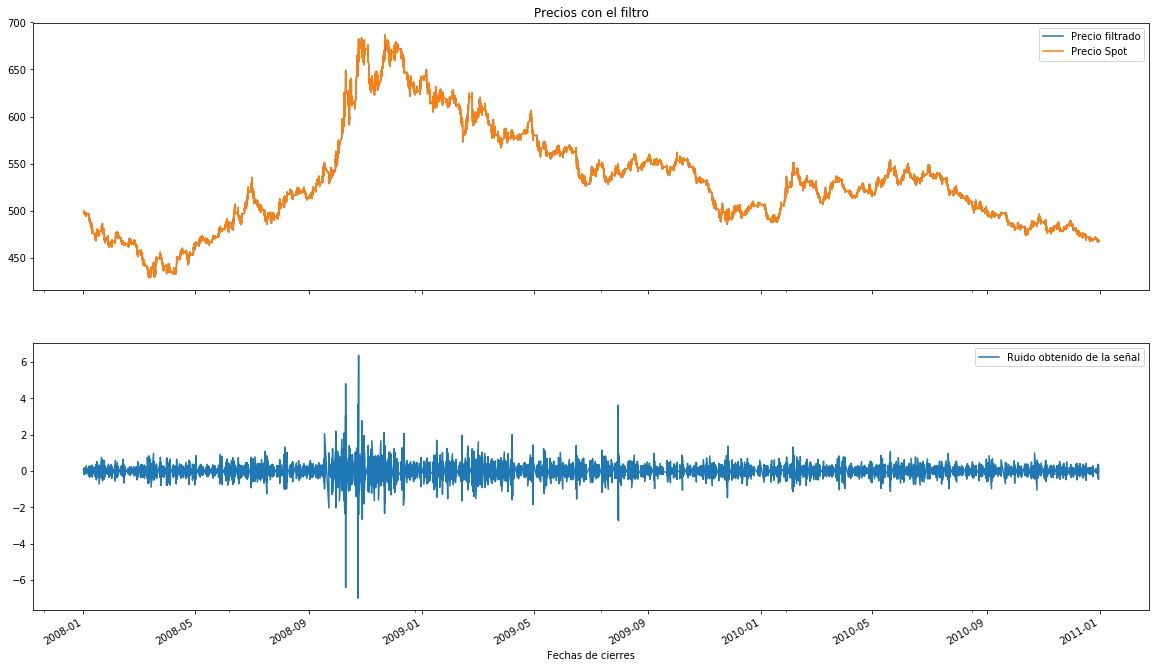

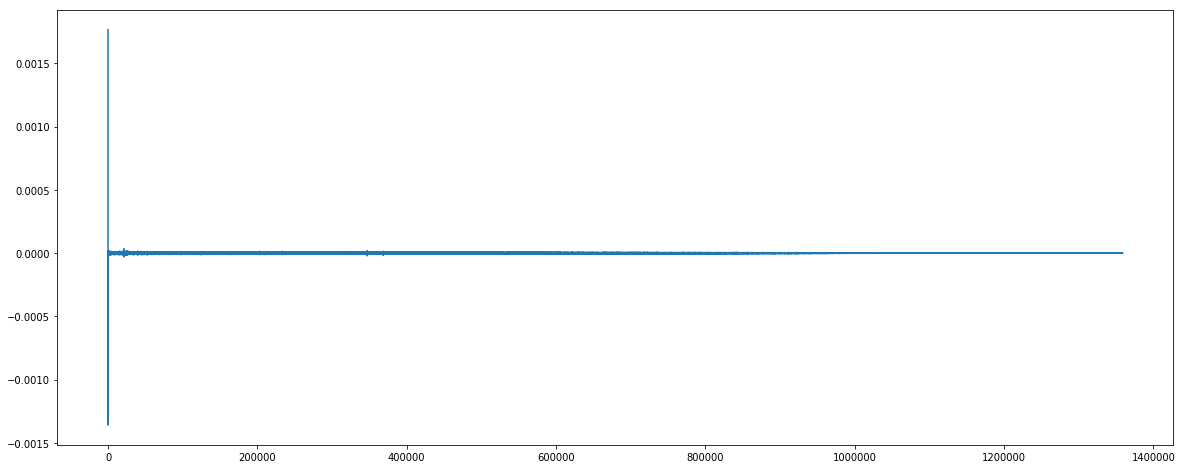

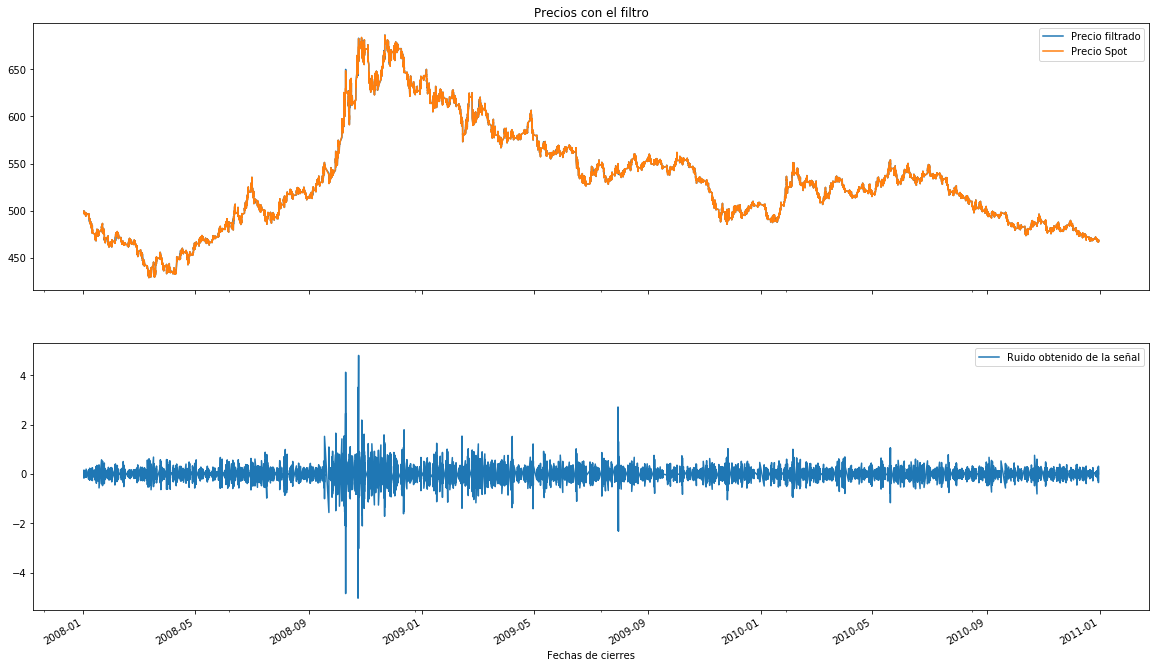

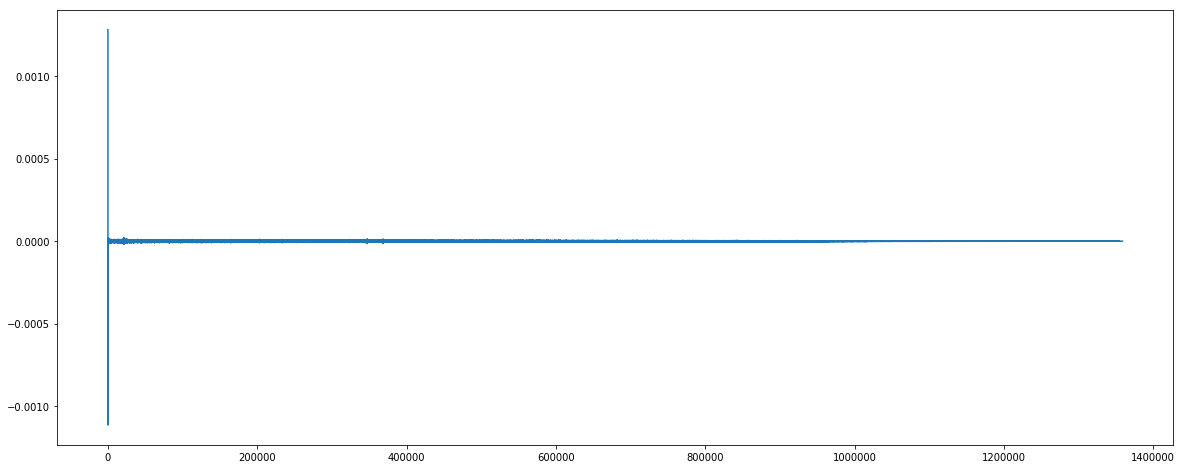

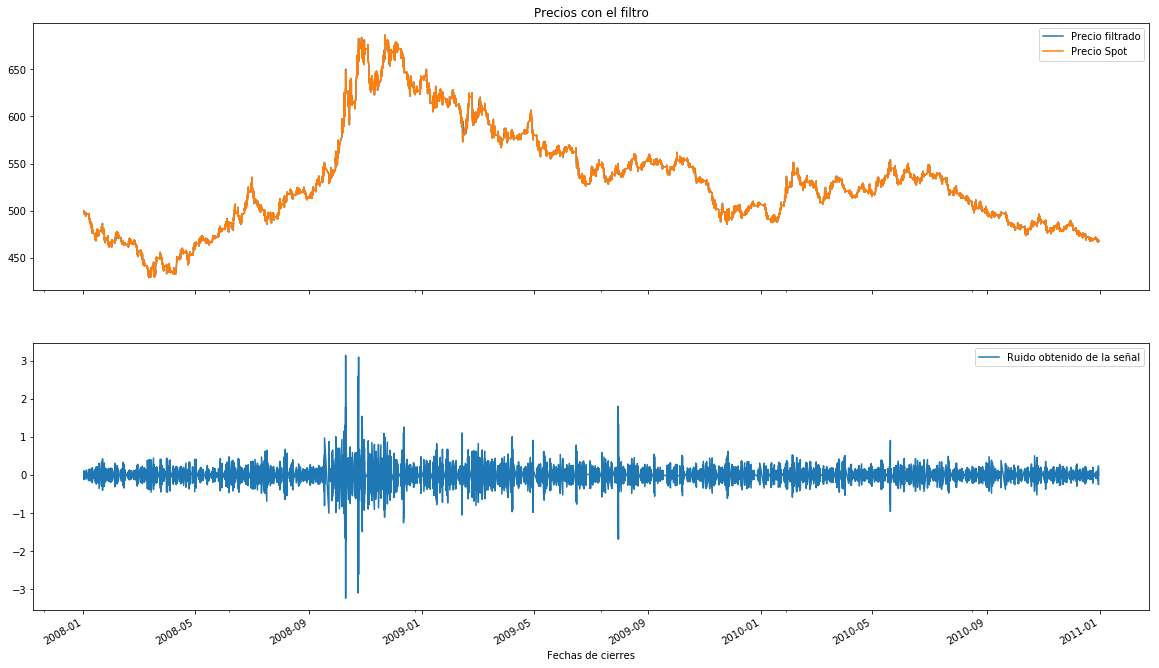

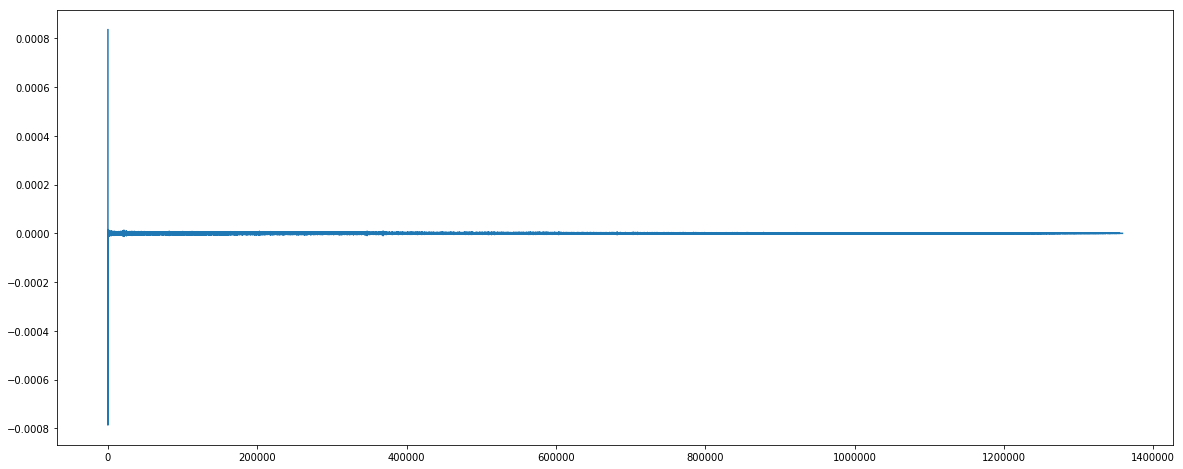

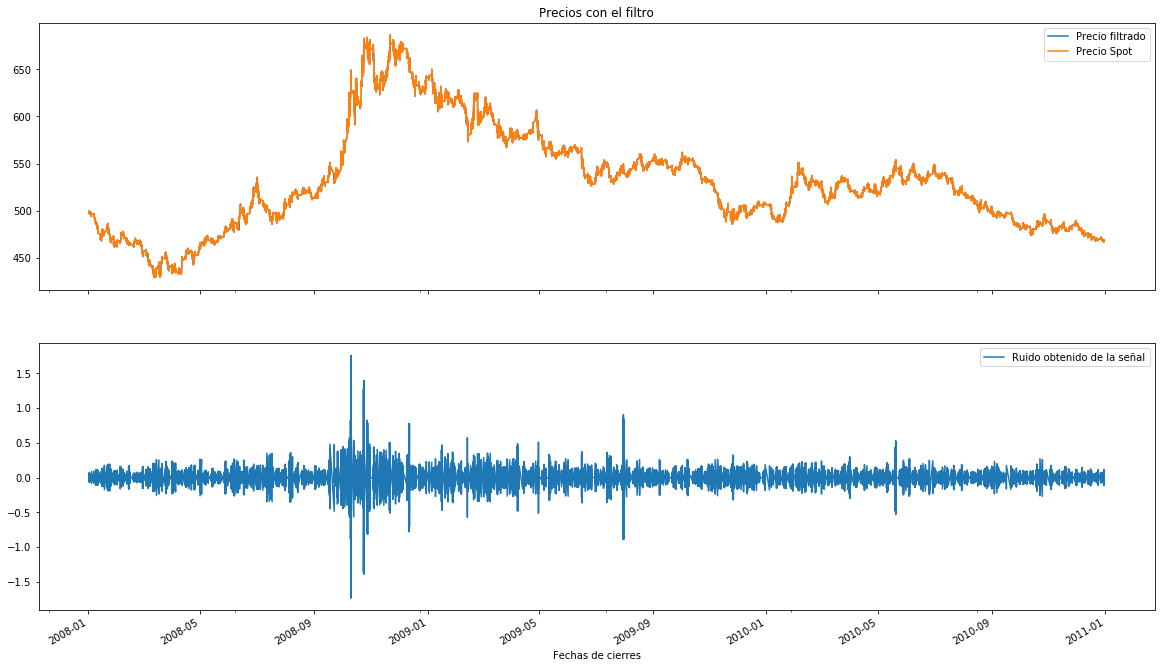

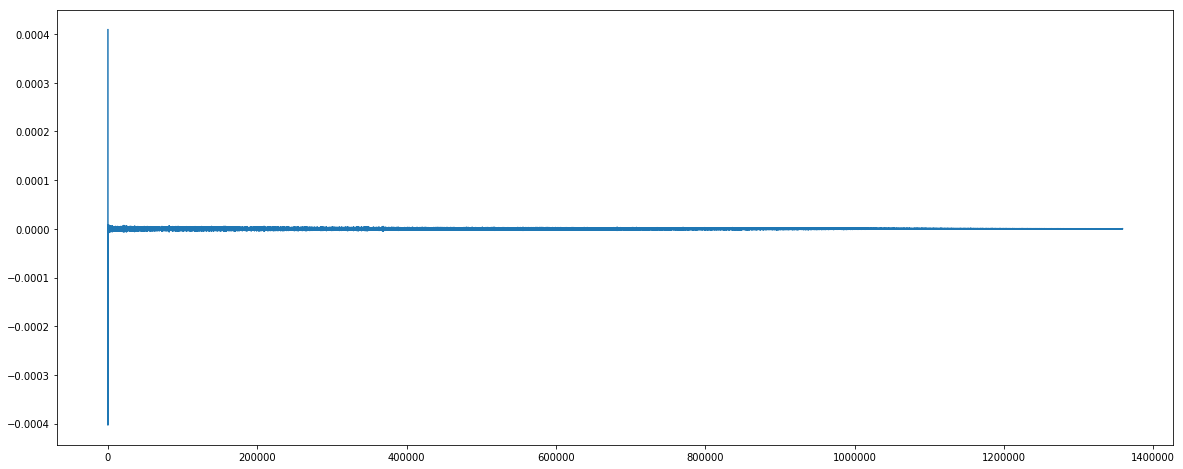

In [5]:
for orden in N:
    for freq in Wn:
        B, A = signal.butter(orden, freq)
        Precio_filtrado=signal.filtfilt(B,A, precios)
        Ruido=precios-Precio_filtrado
        datos.insert(1,"Precio filtrado",Precio_filtrado)
        datos.insert(2,"Ruido",Ruido)
        fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,12),sharex=True)
        datos.plot(y="Precio filtrado",ax=axes[0],title="Precios con el filtro")
        datos.plot(y="Precio Spot",ax=axes[0])
        datos.plot(y="Ruido",ax=axes[1],label="Ruido obtenido de la señal")
        axes[1].set_xlabel("Fechas de cierres")
        plt.savefig("Figuras/filtro_orden_"+str(orden)+"_cutoff_"+str(freq)+".png")
        plt.show()
        plt.figure(figsize=(20,8))
        correlacion=signal.correlate(Ruido,Ruido,mode="full")
        plt.plot(correlacion[len(correlacion)//2:]/len(correlacion))
        plt.savefig("Figuras/correlacion_orden"+str(orden)+"_cutoff_"+str(freq)+".png")
        plt.show()
        datos=datos.drop(["Precio filtrado","Ruido"],axis=1)